## Data Exploration: Migration in Europe

In [1]:
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as pat
from matplotlib import cm

## Immigration & emigration overview



In [2]:
# TOTAL IMMIGRATION DATA
# https://ec.europa.eu/eurostat/cache/metadata/en/migr_immi_esms.htm
df_imm_total = pd.read_excel('migr_imm2ctz.xlsx', sheet_name='total')
df_imm_total

,GEO/TIME,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Belgium,:,:,135281,147377,129477,120078,123158,146626,123702,126703
1,Bulgaria,:,:,:,:,14103,18570,26615,25223,21241,25597
2,Czechia,108267,75620,48317,27114,34337,30124,29897,29602,64083,51847
3,Denmark,57357,51800,52236,52833,54409,60312,68388,78492,74383,68579
4,Germany (until 1990 former territory of the FRG),682146,346216,404055,489422,592175,692713,884893,1543848,1029852,917109
5,Estonia,3671,3884,2810,3709,2639,4109,3904,15413,14822,17616
6,Ireland,82592,50604,52339,57292,61324,65539,73519,80792,85185,78499
7,Greece,66529,58613,60462,60089,58200,57946,59013,64446,116867,112247
8,Spain,599075,392962,360705,371331,304053,280772,305454,342114,414746,532132
9,France,296608,296970,307111,319816,327431,338752,340383,364221,378115,369964


In [3]:
df_imm_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
GEO/TIME    45 non-null object
2008        45 non-null object
2009        45 non-null object
2010        45 non-null object
2011        45 non-null object
2012        45 non-null object
2013        45 non-null object
2014        45 non-null object
2015        45 non-null object
2016        45 non-null object
2017        45 non-null object
dtypes: object(11)
memory usage: 4.0+ KB


In [4]:
df_imm_total.keys()[0]

'GEO/TIME'

In [5]:
# Set index
df_imm_total.set_index('GEO/TIME', inplace=True)

# Replace colons with missing value NaNs and set datatype
df_imm_total = df_imm_total.apply(pd.to_numeric, errors='coerce')

# Drop rows with no data
df_imm_total.dropna(how='all', inplace=True)

# Explore remaining missing values
df_imm_total[df_imm_total.isnull().sum(axis=1) > 0]

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
GEO/TIME,,,,,,,,,,
Belgium,NaN,NaN,135281.0,147377.0,129477.0,120078.0,123158.0,146626.0,123702.0,126703.0
Bulgaria,NaN,NaN,NaN,NaN,14103.0,18570.0,26615.0,25223.0,21241.0,25597.0


In [6]:
# Backfill missing values
df_imm_total.bfill(axis=1, inplace=True)

# Rename Germany
df_imm_total.index = [s.replace('Germany (until 1990 former territory of the FRG)', 'Germany') for s in df_imm_total.index]

# Strip column names
df_imm_total.columns = [col.strip() for col in df_imm_total.columns]

df_imm_total.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Belgium,135281.0,135281.0,135281.0,147377.0,129477.0,120078.0,123158.0,146626.0,123702.0,126703.0
Bulgaria,14103.0,14103.0,14103.0,14103.0,14103.0,18570.0,26615.0,25223.0,21241.0,25597.0
Czechia,108267.0,75620.0,48317.0,27114.0,34337.0,30124.0,29897.0,29602.0,64083.0,51847.0
Denmark,57357.0,51800.0,52236.0,52833.0,54409.0,60312.0,68388.0,78492.0,74383.0,68579.0
Germany,682146.0,346216.0,404055.0,489422.0,592175.0,692713.0,884893.0,1543848.0,1029852.0,917109.0


In [7]:
# Eurostat dataset cleaning function
countries = df_imm_total.index.tolist()

def clean_eurostat_excel(file_name, sheet):
    data = pd.read_excel(file_name, sheet_name = sheet, index_col=0)

    # rename Germany
    data.index = [str(s).replace('Germany (until 1990 former territory of the FRG)', 'Germany') for s in data.index]

    # replace ':' with NaNs, set datatype, and impute missing data with backfill/frontfill
    data = data.apply(pd.to_numeric, errors='coerce').bfill(axis=1).ffill(axis=1)
    
    # drop rows with no data
    data.dropna(how='all', inplace=True)

    # strip column names of extraneous spaces
    data.columns = [col.strip() for col in data.columns]
    
    # reduce rows to country list
    data = data.loc[countries]

    return data;

In [8]:
df_imm_total = clean_eurostat_excel('migr_imm2ctz.xlsx', 'total')

df_imm_total.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Belgium,135281.0,135281.0,135281.0,147377.0,129477.0,120078.0,123158.0,146626.0,123702.0,126703.0
Bulgaria,14103.0,14103.0,14103.0,14103.0,14103.0,18570.0,26615.0,25223.0,21241.0,25597.0
Czechia,108267.0,75620.0,48317.0,27114.0,34337.0,30124.0,29897.0,29602.0,64083.0,51847.0
Denmark,57357.0,51800.0,52236.0,52833.0,54409.0,60312.0,68388.0,78492.0,74383.0,68579.0
Germany,682146.0,346216.0,404055.0,489422.0,592175.0,692713.0,884893.0,1543848.0,1029852.0,917109.0


In [9]:
# TOTAL EMIGRATION DATA
# https://ec.europa.eu/eurostat/cache/metadata/en/migr_immi_esms.htm
df_emi_total = clean_eurostat_excel('migr_emi1ctz.xlsx', 'total')

df_emi_total.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Belgium,66013.0,66013.0,66013.0,84148.0,93600.0,102657.0,94573.0,89794.0,92471.0,89690.0
Bulgaria,16615.0,16615.0,16615.0,16615.0,16615.0,19678.0,28727.0,29470.0,30570.0,31586.0
Czechia,51478.0,61782.0,61069.0,55910.0,46106.0,25894.0,28468.0,25684.0,38864.0,27316.0
Denmark,38356.0,39899.0,41456.0,41593.0,43663.0,43310.0,44426.0,44625.0,52654.0,56403.0
Germany,737889.0,286582.0,252456.0,249045.0,240001.0,259328.0,324221.0,347162.0,533762.0,560700.0


In [10]:
# Pivot transformation to long-form for visual analysis
def df_to_longform(df, data_col_name):
    
    df = pd.melt(df.reset_index(), id_vars='index')

    df.columns=('country','year', data_col_name)

    df.sort_values(by=['country','year'], inplace=True)

    df['year'] = df['year'].astype(str)

    return df;

In [11]:
dfg_imm_total = df_to_longform(df_imm_total, 'immigrants')

dfg_imm_total.head()

,country,year,immigrants
19,Austria,2008,73772.0
51,Austria,2009,69295.0
83,Austria,2010,70978.0
115,Austria,2011,82230.0
147,Austria,2012,91557.0


In [12]:
dfg_imm_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 19 to 315
Data columns (total 3 columns):
country       320 non-null object
year          320 non-null object
immigrants    320 non-null float64
dtypes: float64(1), object(2)
memory usage: 10.0+ KB


In [13]:
# Dataframe to long-form for graphing
dfg_emi_total = df_to_longform(df_emi_total, 'emigrants')

dfg_emi_total.head()

,country,year,emigrants
19,Austria,2008,51563.0
51,Austria,2009,53244.0
83,Austria,2010,51651.0
115,Austria,2011,51197.0
147,Austria,2012,51812.0


In [14]:
# Combining long-form dataframes to graph
dfg = pd.merge(dfg_imm_total, dfg_emi_total, on=['country', 'year'])

dfg.head()

,country,year,immigrants,emigrants
0,Austria,2008,73772.0,51563.0
1,Austria,2009,69295.0,53244.0
2,Austria,2010,70978.0,51651.0
3,Austria,2011,82230.0,51197.0
4,Austria,2012,91557.0,51812.0


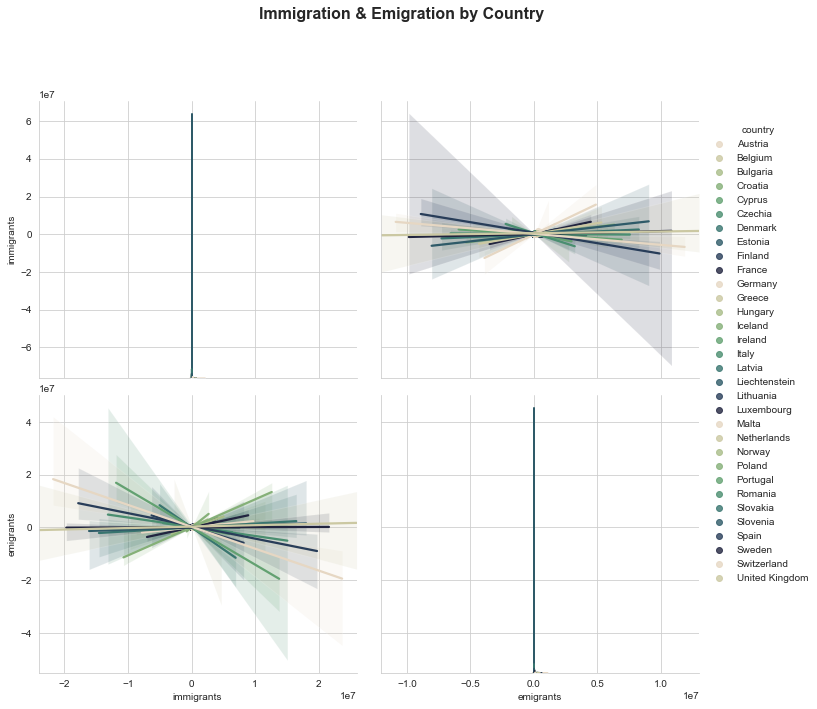

In [15]:
# Style
sns.set_style('whitegrid')

# Pairplot by country
pal = sns.cubehelix_palette(10, start=0.3, rot=-0.8)
g = sns.pairplot(dfg, vars=dfg.iloc[:,2:4],
            height=5, palette=pal, kind='reg', hue='country')

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Immigration & Emigration by Country', size=16, weight='demi');

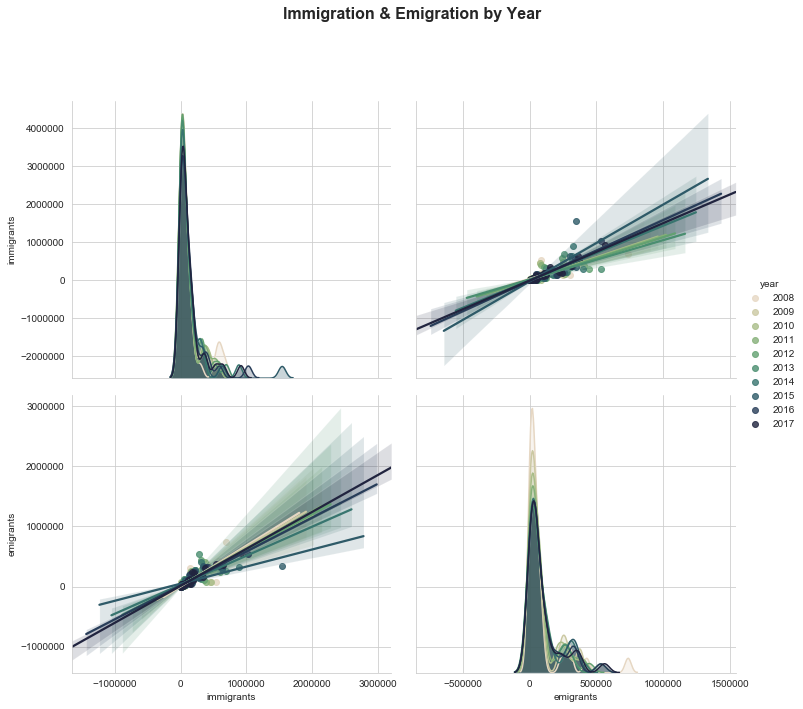

In [16]:
# Pairplot by years
pal = sns.cubehelix_palette(10, start=0.3, rot=-0.8)
g = sns.pairplot(dfg, vars=dfg.iloc[:,2:4],
            height=5, palette=pal, kind='reg', hue='year')

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Immigration & Emigration by Year', size=16, weight='demi');

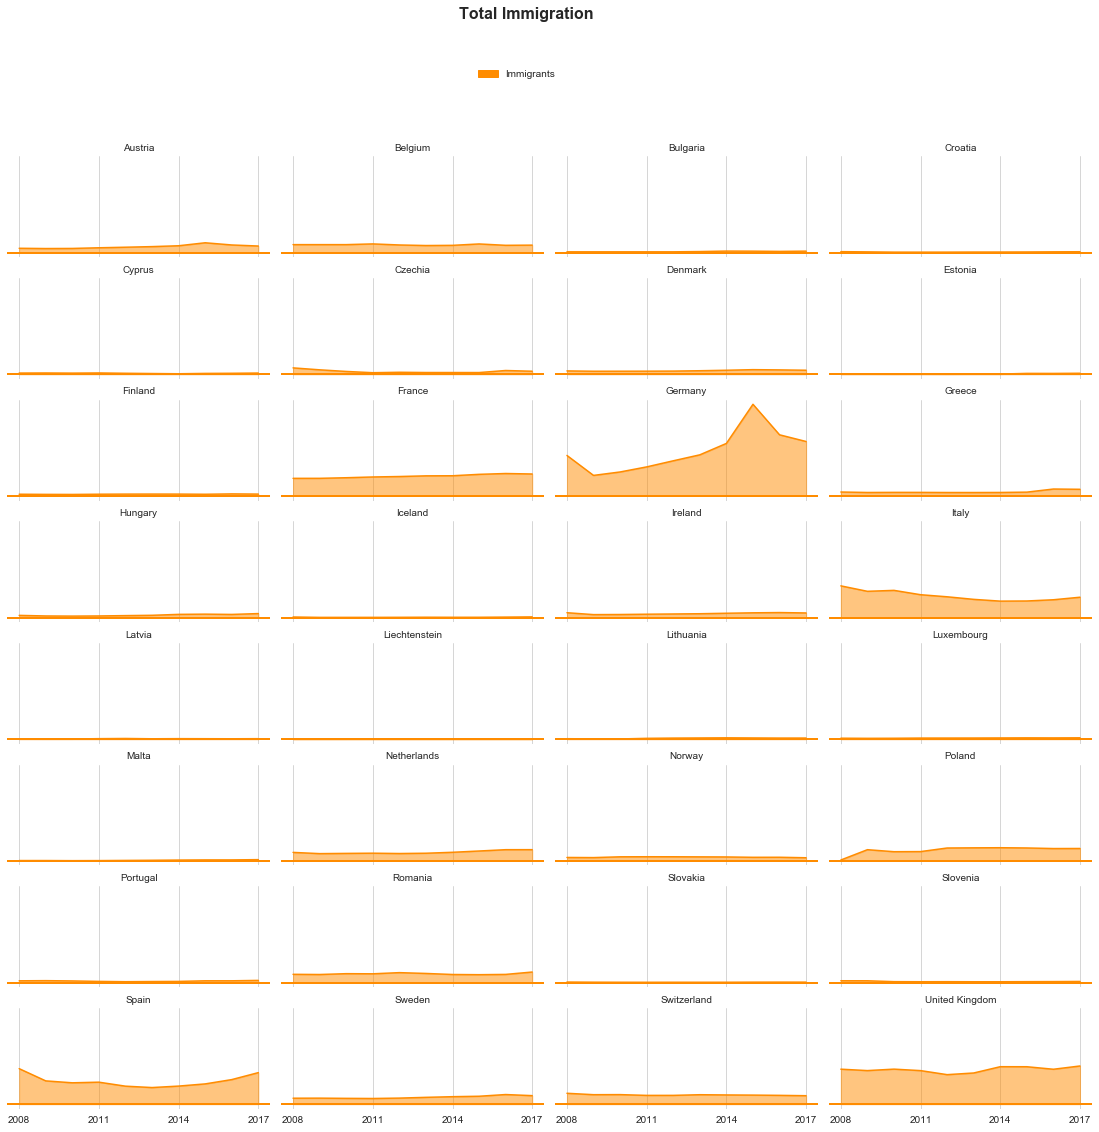

In [17]:
# Initialize FacetGrid object
g = sns.FacetGrid(dfg_imm_total, col='country', col_wrap=4, 
                  height=2,aspect=2).set(xticks=np.arange(0,10,3))

# Create plot
g.map(plt.plot, 'year', 'immigrants',  color='darkorange')
g.map(plt.fill_between, 'year', 'immigrants',  color='darkorange', alpha=0.5)
g.map(plt.axhline, y=0, lw=2, color='darkorange')

# Facet titles
for ax in g.axes:
    g.set_titles("{col_name}")

# Formatting axes
g.set(yticks=[])
g.despine(bottom=True, left=True)

# Legend
color_key = {'Immigrants': 'darkorange'}
patches =  [pat.Patch(color=v, label=k) for k,v in color_key.items()]

g.fig.legend(handles=patches, bbox_to_anchor =
             [0.49, 0.93]).get_frame().set_edgecolor('1.0')

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Total Immigration', size=16, weight='demi');

In [18]:
# FIRST GENERATION IMMIGRANTS REASONS DATA 2014
# https://ec.europa.eu/eurostat/cache/metadata/en/lfso_14_esms.htm
df_imm_fgen_bythous = clean_eurostat_excel('lfso_14b1dr.xlsx', 'Reason first gen imm 2014')

df_imm_fgen_bythous[df_imm_fgen_bythous.isnull().sum(axis=1) > 0]

C:\Users\Hillary\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


,Total,Family reasons,Education reasons,"Work, job found before migrating","Work, no job found before migrating",International protection or asylum,Other,No response
Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ireland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Iceland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Drop countries with no data
df_imm_fgen_bythous.dropna(how='all', inplace=True)

# Order dataframe by total first generation immigrants
df_imm_fgen_bythous.sort_values(by=['Total'], inplace=True, ascending=False)

fgen_order = df_imm_fgen_bythous.index

# Drop total - only graphing reasons
df_imm_fgen_bythous.drop('Total', axis=1, inplace=True)

# Dataframe to long-form for graphing
dfg_imm_fgen_bythous = df_to_longform(df_imm_fgen_bythous, 'x')

dfg_imm_fgen_bythous.columns = ['country', 'Reason', 'thousands']

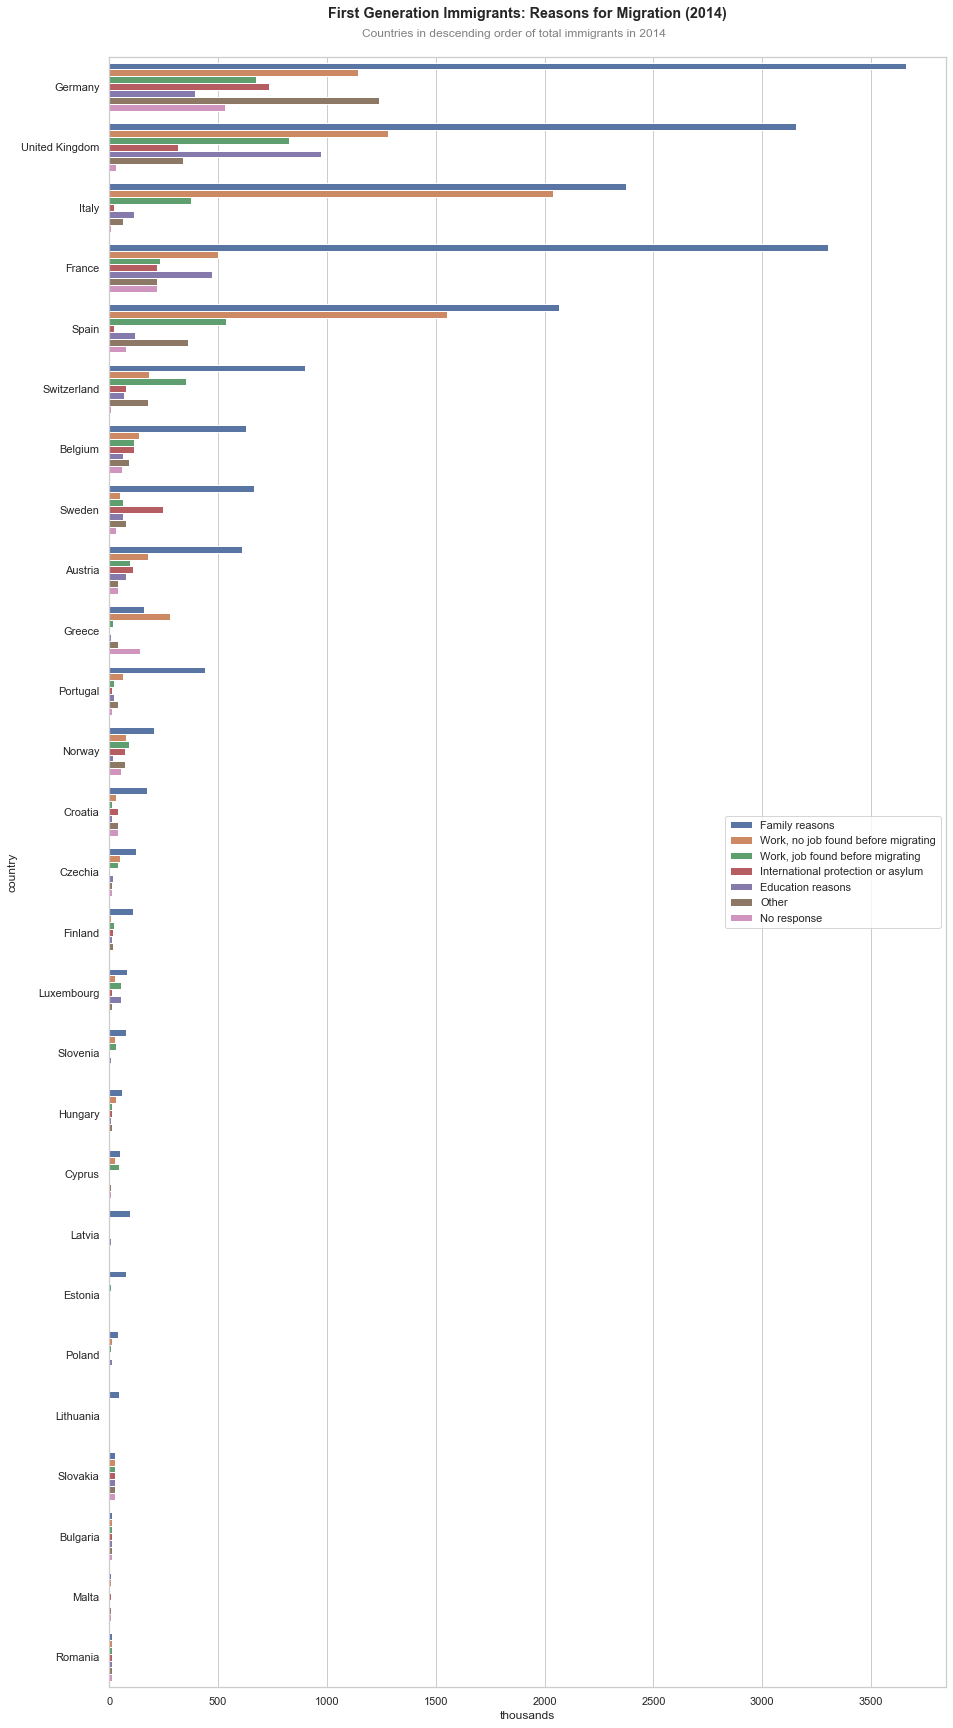

In [20]:
# Set plots and style
sns.set(rc={'figure.figsize':(15,30)}, style='whitegrid')

# Plot
ax = sns.barplot(data=dfg_imm_fgen_bythous, x='thousands', y='country', hue='Reason',
                 palette=sns.color_palette('deep', 7), order=fgen_order, 
                 hue_order=['Family reasons', 'Work, no job found before migrating', 
                      'Work, job found before migrating', 
                       'International protection or asylum', 'Education reasons', 
                       'Other', 'No response']) #

# Legend
plt.legend(loc='center right')

# Title
ax.set_title('First Generation Immigrants: Reasons for Migration (2014)', fontsize='large', fontweight='demi', y=1.02)
plt.figtext(0.5,0.893, 'Countries in descending order of total immigrants in 2014', ha="center", va="top", fontsize=12, color='grey'); 

In [21]:
# Create boolean criteria for subplots
df_imm_fgen_bythous['Fam500k+'] = df_imm_fgen_bythous['Family reasons'] > 500
df_imm_fgen_bythous['Fam100k+'] = df_imm_fgen_bythous['Family reasons'] > 100

df_imm_fgen_bythous.head()

,Family reasons,Education reasons,"Work, job found before migrating","Work, no job found before migrating",International protection or asylum,Other,No response,Fam500k+,Fam100k+
Germany,3661.4,396.4,676.5,1142.0,733.0,1238.5,530.8,True,True
United Kingdom,3154.4,974.4,827.7,1282.0,318.2,338.3,32.1,True,True
Italy,2375.3,114.0,376.4,2039.5,23.6,65.8,7.6,True,True
France,3301.5,473.8,232.2,500.1,219.4,219.5,219.5,True,True
Spain,2068.3,119.7,534.8,1552.1,24.3,360.7,76.7,True,True


In [22]:
# Creating sub-dataframes for zoomed-in subplots
df_imm_fgen_bythous_lar = df_imm_fgen_bythous.loc[df_imm_fgen_bythous['Fam500k+'] == True].drop(
    ['Fam500k+', 'Fam100k+'], axis=1)

df_imm_fgen_bythous_med = df_imm_fgen_bythous.loc[(df_imm_fgen_bythous['Fam500k+'] == False) & (
    df_imm_fgen_bythous['Fam100k+'] == True)].drop(
    ['Fam500k+', 'Fam100k+'], axis=1)

df_imm_fgen_bythous_sma = df_imm_fgen_bythous.loc[df_imm_fgen_bythous['Fam100k+'] == False].drop(
    ['Fam500k+', 'Fam100k+'], axis=1)

df_imm_fgen_bythous_lar.head()

,Family reasons,Education reasons,"Work, job found before migrating","Work, no job found before migrating",International protection or asylum,Other,No response
Germany,3661.4,396.4,676.5,1142.0,733.0,1238.5,530.8
United Kingdom,3154.4,974.4,827.7,1282.0,318.2,338.3,32.1
Italy,2375.3,114.0,376.4,2039.5,23.6,65.8,7.6
France,3301.5,473.8,232.2,500.1,219.4,219.5,219.5
Spain,2068.3,119.7,534.8,1552.1,24.3,360.7,76.7


In [23]:
# Data to long-form for graphing
dfg_imm_fgen_bythous_lar = df_to_longform(df_imm_fgen_bythous_lar, 'x')
dfg_imm_fgen_bythous_med = df_to_longform(df_imm_fgen_bythous_med, 'x')
dfg_imm_fgen_bythous_sma = df_to_longform(df_imm_fgen_bythous_sma, 'x')

dfg_imm_fgen_bythous_lar.columns = ['country', 'Reason', 'thousands']
dfg_imm_fgen_bythous_med.columns = ['country', 'Reason', 'thousands']
dfg_imm_fgen_bythous_sma.columns = ['country', 'Reason', 'thousands']

dfg_imm_fgen_bythous_lar.head()

,country,Reason,thousands
17,Austria,Education reasons,77.2
8,Austria,Family reasons,608.9
44,Austria,International protection or asylum,109.7
62,Austria,No response,39.0
53,Austria,Other,39.0


In [24]:
# Sort for graphing order
dfg_imm_fgen_bythous_lar.sort_values(by=['thousands'], ascending=False, inplace=True)

dfg_imm_fgen_bythous_med.sort_values(by=['thousands'], ascending=False, inplace=True)

dfg_imm_fgen_bythous_sma.sort_values(by=['thousands'], ascending=False, inplace=True)

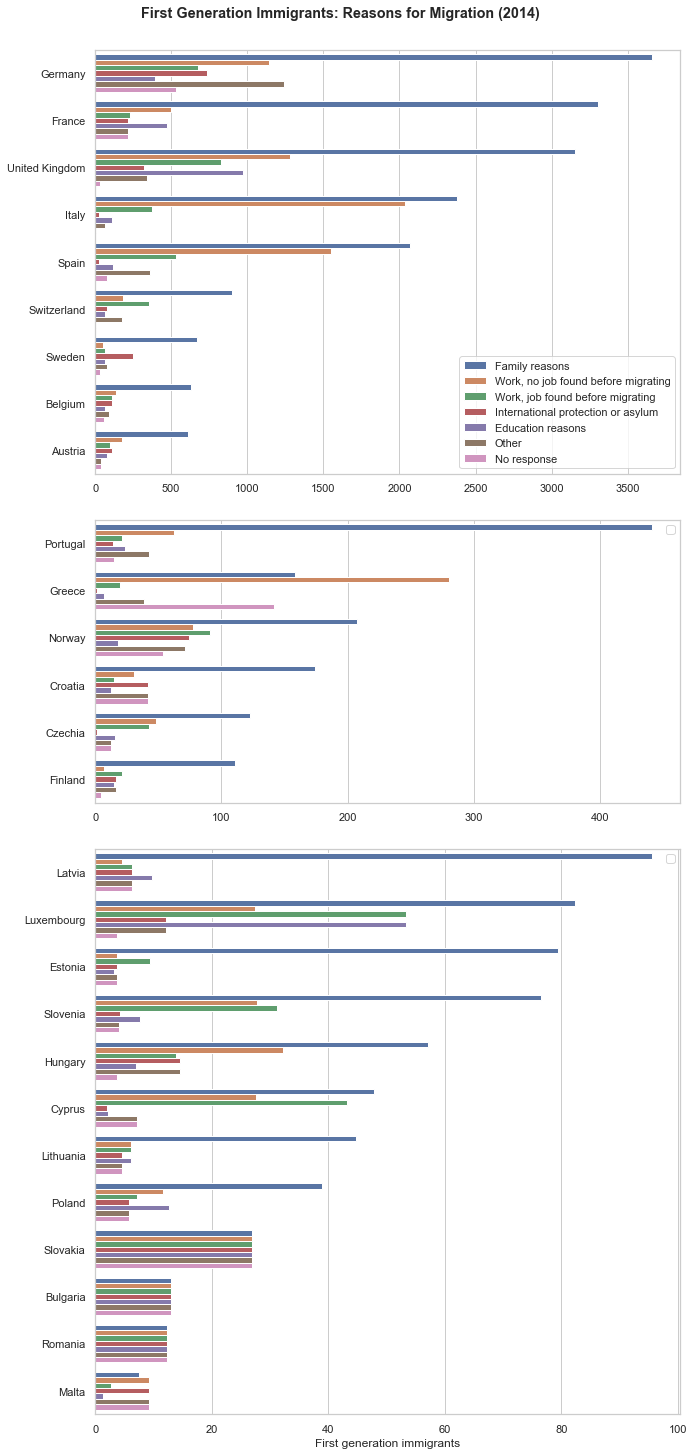

In [25]:
# Set plots and style
fig, axs = plt.subplots(3, figsize=(10, 20), gridspec_kw={'height_ratios': [3, 2, 4]})

# Set style
sns.set_style('whitegrid')

# First subplot (> 500k family reasons)
p0 = sns.barplot(data=dfg_imm_fgen_bythous_lar, x='thousands', y='country', hue='Reason',
                 palette=sns.color_palette('deep', 7),
                 hue_order=['Family reasons', 'Work, no job found before migrating', 
                      'Work, job found before migrating', 
                       'International protection or asylum', 'Education reasons', 
                       'Other', 'No response'], ax=axs[0])
# Second subplot (200k > 500k family reasons)
p1 = sns.barplot(data=dfg_imm_fgen_bythous_med, x='thousands', y='country', hue='Reason',
                palette=sns.color_palette('deep', 7),
                 hue_order=['Family reasons', 'Work, no job found before migrating', 
                      'Work, job found before migrating', 
                       'International protection or asylum', 'Education reasons', 
                       'Other', 'No response'], ax=axs[1])

# Third subplot (< 200k family reasons)
p2 = sns.barplot(data=dfg_imm_fgen_bythous_sma, x='thousands', y='country', hue='Reason',
                 palette=sns.color_palette('deep', 7),
                 hue_order=['Family reasons', 'Work, no job found before migrating', 
                      'Work, job found before migrating', 
                       'International protection or asylum', 'Education reasons', 
                       'Other', 'No response'], ax=axs[2])


# Formatting
fig.tight_layout()
axs[0].set(xlabel='', ylabel='')
axs[1].set(xlabel='', ylabel='')
axs[2].set(xlabel='First generation immigrants', ylabel='')

# Legend
handles, labels = axs[2].get_legend_handles_labels()
p0.legend(loc='lower right')
p1.legend(handles[:0], labels[:0])
p2.legend(handles[:0], labels[:0])

# Title
plt.subplots_adjust(top=0.98)
fig.suptitle('First Generation Immigrants: Reasons for Migration (2014)', fontsize='large', fontweight='demi', y=1.01); 


In [26]:
dfi_imm_fgen_bythous = df_imm_fgen_bythous.reset_index()

dfi_imm_fgen_bythous.head()

,index,Family reasons,Education reasons,"Work, job found before migrating","Work, no job found before migrating",International protection or asylum,Other,No response,Fam500k+,Fam100k+
0,Germany,3661.4,396.4,676.5,1142.0,733.0,1238.5,530.8,True,True
1,United Kingdom,3154.4,974.4,827.7,1282.0,318.2,338.3,32.1,True,True
2,Italy,2375.3,114.0,376.4,2039.5,23.6,65.8,7.6,True,True
3,France,3301.5,473.8,232.2,500.1,219.4,219.5,219.5,True,True
4,Spain,2068.3,119.7,534.8,1552.1,24.3,360.7,76.7,True,True


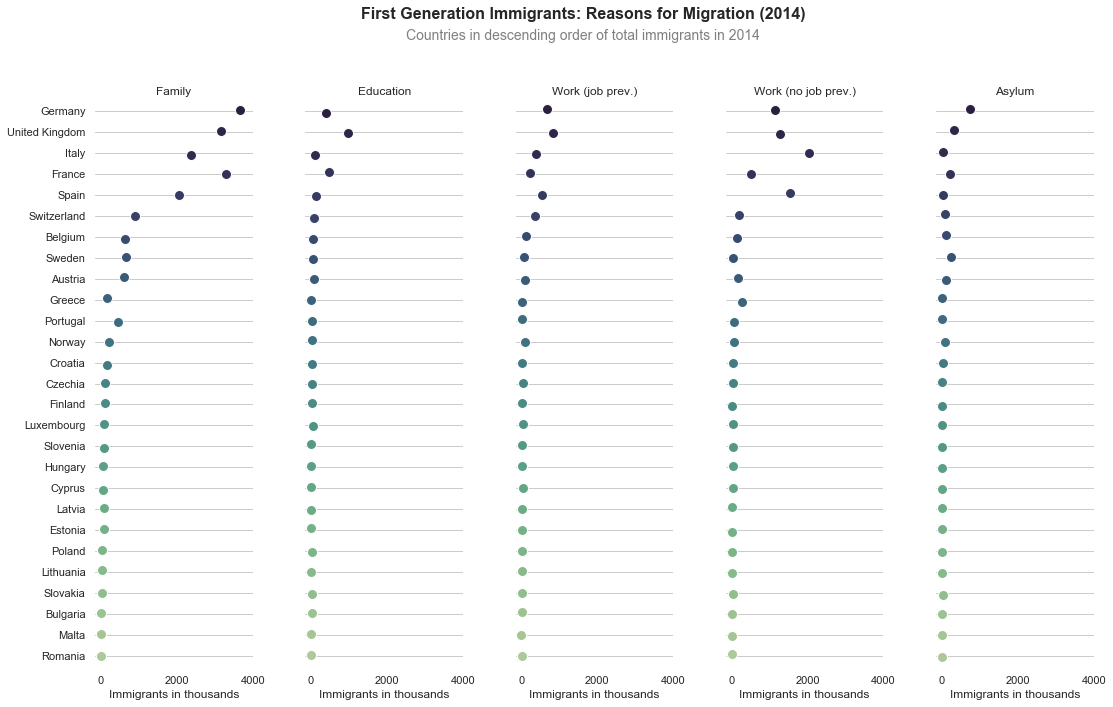

In [27]:
# Set up PairGrid
g = sns.PairGrid(data=dfi_imm_fgen_bythous,
                x_vars=dfi_imm_fgen_bythous.columns[1:6], y_vars=['index'],
                height=10, aspect=0.3)

# Create stripplot
g.map(sns.stripplot, size=10, orient='h', palette=sns.cubehelix_palette(32, start=0.5, rot=-0.8, reverse=True),
     linewidth=1, edgecolor='w')

# Set x-axis limits on all columns
g.set(xlim=(-150, 4000), xlabel="Immigrants in thousands", ylabel="")

# Column titles
titles = ['Family', 'Education', 'Work (job prev.)', 'Work (no job prev.)', 'Asylum']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('First Generation Immigrants: Reasons for Migration (2014)', size=16, weight='demi')
plt.figtext(0.5,0.95, 'Countries in descending order of total immigrants in 2014', ha="center", va="top", fontsize=14, color='grey')

sns.despine(left=True, bottom=True);

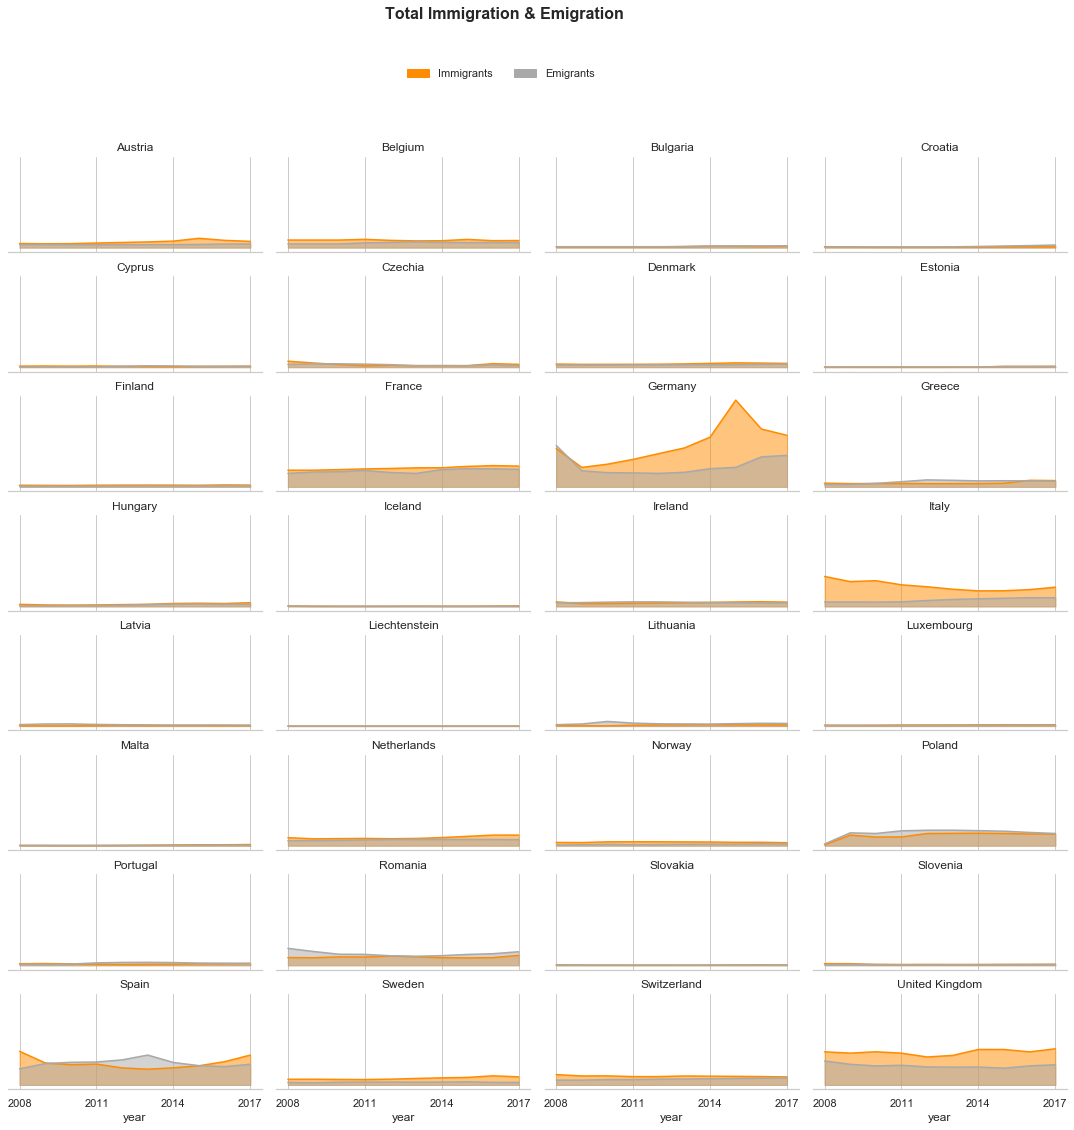

In [28]:
# Initialize FacetGrid object
g = sns.FacetGrid(dfg, col='country', col_wrap=4, 
                  height=2,aspect=2).set(xticks=np.arange(0,10,3))


# Create immigration plot - set for immigrants
g.map(plt.plot, 'year', 'immigrants', color='darkorange')
g.map(plt.fill_between, 'year', 'immigrants',  color='darkorange', alpha=0.5)

g.map(plt.plot, 'year', 'emigrants', color='darkgrey')
g.map(plt.fill_between, 'year', 'emigrants',  color='darkgrey', alpha=0.5)

# Facet titles
for ax in g.axes:
    g.set_titles("{col_name}")
    g.set_axis_labels(y_var= '')

# Formatting axes
g.set(yticks=[])
g.despine(left=True)

# Legend
color_key = {'Immigrants': 'darkorange',
            'Emigrants' : 'darkgrey'}

patches =  [pat.Patch(color=v, label=k) for k,v in color_key.items()]

g.fig.legend(handles=patches, bbox_to_anchor =
             [0.525, 0.93], ncol=2).get_frame().set_edgecolor('1.0')

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Total Immigration & Emigration', size=16, weight='demi');

In [29]:
# REPORTING COUNTRY EMIGRATION DATA 
# https://ec.europa.eu/eurostat/cache/metadata/en/migr_immi_esms.htm
df_emi_reporting = clean_eurostat_excel('migr_emi1ctz.xlsx', 'reporting_country')

# Pivot transformation to long-form for visual analysis
dfg_emi_reporting = df_to_longform(df_emi_reporting, 'reporting_country_emi')

# Merge for graphing
dfg = pd.merge(dfg, dfg_emi_reporting, on=['country', 'year'])

dfg.isnull().sum()

country                  0
year                     0
immigrants               0
emigrants                0
reporting_country_emi    0
dtype: int64

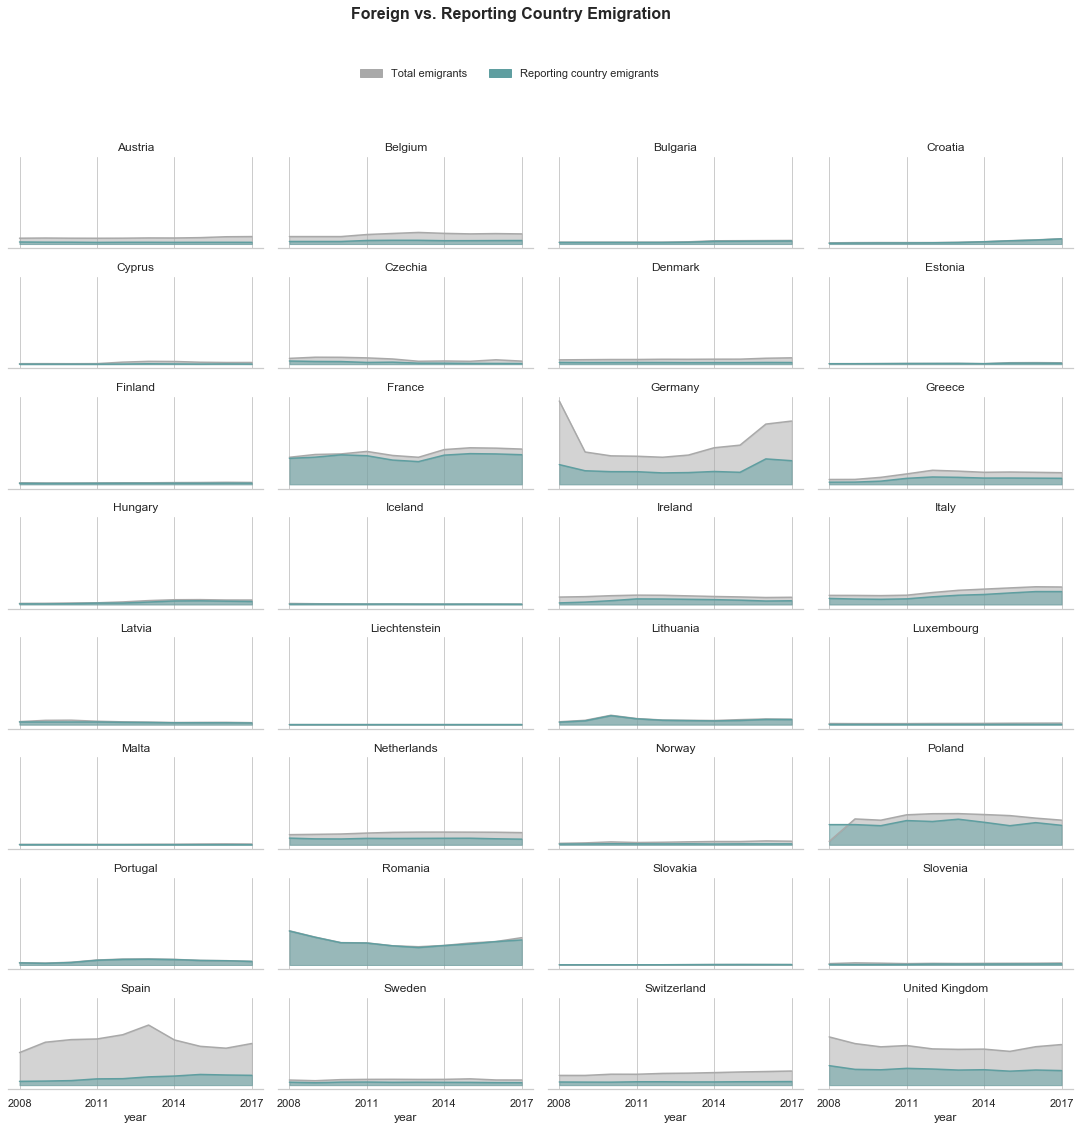

In [30]:
# Initialize FacetGrid object
g = sns.FacetGrid(dfg, col='country', col_wrap=4, 
                  height=2,aspect=2).set(xticks=np.arange(0,10,3))

# Create immigration plot - set for immigrants
g.map(plt.plot, 'year', 'emigrants', color='darkgrey')
g.map(plt.fill_between, 'year', 'emigrants',  color='darkgrey', alpha=0.5)

g.map(plt.plot, 'year', 'reporting_country_emi', color='cadetblue')
g.map(plt.fill_between, 'year', 'reporting_country_emi',  color='cadetblue', alpha=0.5)

# Facet titles
for ax in g.axes:
    g.set_titles("{col_name}")
    g.set_axis_labels(y_var= '')

# Formatting axes
g.set(yticks=[])
g.despine(left=True)

# Legend
color_key = {'Total emigrants': 'darkgrey',
            'Reporting country emigrants' : 'cadetblue'}

patches =  [pat.Patch(color=v, label=k) for k,v in color_key.items()]

g.fig.legend(handles=patches, bbox_to_anchor =
             [0.58, 0.93], ncol=2).get_frame().set_edgecolor('1.0')

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Foreign vs. Reporting Country Emigration', size=16, weight='demi');

In [31]:
# WORLD POPULATION DATA (IN THOUSANDS)
# https://population.un.org/wpp/Download/Standard/Population/
df_pop = pd.read_excel('world_population.xlsx')
df_pop

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,285,Estimates,Bermuda,14,60,Country/Area,918,37.256,37.8,38.437,...,65.076,64.737,64.381,64.038,63.695,63.36,63.04,62.763,62.508,62.273
301,286,Estimates,Canada,NaN,124,Country/Area,918,13733.4,14078.4,14445.5,...,34539.2,34922,35296.5,35664.3,36026.7,36382.9,36732.1,37074.6,37411,37742.2
302,287,Estimates,Greenland,26,304,Country/Area,918,22.993,23.466,23.936,...,56.555,56.477,56.412,56.383,56.378,56.408,56.473,56.565,56.66,56.772
303,288,Estimates,Saint Pierre and Miquelon,2,666,Country/Area,918,4.567,4.609,4.648,...,6.323,6.251,6.168,6.073,5.992,5.933,5.885,5.845,5.821,5.795


In [32]:
# Select subset of dataframe
df_pop = df_pop.iloc[15:, 2:]
df_pop.head()

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
15,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,1953,1954,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
16,WORLD,NaN,900,World,0,2.53643e+06,2.58403e+06,2.63086e+06,2.67761e+06,2.72485e+06,...,7.04119e+06,7.12583e+06,7.21058e+06,7.29529e+06,7.3798e+06,7.46402e+06,7.54786e+06,7.63109e+06,7.71347e+06,7.7948e+06
17,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,More developed regions,b,901,Development Group,1803,814819,824004,833720,843788,854060,...,1.23956e+06,1.24411e+06,1.24845e+06,1.25262e+06,1.25662e+06,1.26048e+06,1.26415e+06,1.26756e+06,1.27063e+06,1.2733e+06
19,Less developed regions,c,902,Development Group,1803,1.72161e+06,1.76003e+06,1.79714e+06,1.83382e+06,1.87079e+06,...,5.80164e+06,5.88171e+06,5.96213e+06,6.04268e+06,6.12317e+06,6.20354e+06,6.28371e+06,6.36353e+06,6.44284e+06,6.52149e+06


In [33]:
# Create new column header
df_pop.columns = df_pop.iloc[0]
df_pop = df_pop[1:]

df_pop.head()

15,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,1953,1954,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
16,WORLD,NaN,900,World,0,2.53643e+06,2.58403e+06,2.63086e+06,2.67761e+06,2.72485e+06,...,7.04119e+06,7.12583e+06,7.21058e+06,7.29529e+06,7.3798e+06,7.46402e+06,7.54786e+06,7.63109e+06,7.71347e+06,7.7948e+06
17,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,More developed regions,b,901,Development Group,1803,814819,824004,833720,843788,854060,...,1.23956e+06,1.24411e+06,1.24845e+06,1.25262e+06,1.25662e+06,1.26048e+06,1.26415e+06,1.26756e+06,1.27063e+06,1.2733e+06
19,Less developed regions,c,902,Development Group,1803,1.72161e+06,1.76003e+06,1.79714e+06,1.83382e+06,1.87079e+06,...,5.80164e+06,5.88171e+06,5.96213e+06,6.04268e+06,6.12317e+06,6.20354e+06,6.28371e+06,6.36353e+06,6.44284e+06,6.52149e+06
20,Least developed countries,d,941,Development Group,902,195428,199180,203015,206986,211133,...,856471,876867,897793,919223,941131,963520,986385,1.00969e+06,1.03339e+06,1.05744e+06


In [34]:
# Cleaning up index
df_pop.set_index('Region, subregion, country or area *',inplace=True)
df_pop.drop(['Notes','Country code','Type','Parent code'],axis=1, inplace=True)
df_pop.head()

15,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
"Region, subregion, country or area *",,,,,,,,,,,,,,,,,,,,,
WORLD,2.53643e+06,2.58403e+06,2.63086e+06,2.67761e+06,2.72485e+06,2.77302e+06,2.82244e+06,2.87331e+06,2.92569e+06,2.97958e+06,...,7.04119e+06,7.12583e+06,7.21058e+06,7.29529e+06,7.3798e+06,7.46402e+06,7.54786e+06,7.63109e+06,7.71347e+06,7.7948e+06
UN development groups,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
More developed regions,814819,824004,833720,843788,854060,864430,874824,885207,895576,905949,...,1.23956e+06,1.24411e+06,1.24845e+06,1.25262e+06,1.25662e+06,1.26048e+06,1.26415e+06,1.26756e+06,1.27063e+06,1.2733e+06
Less developed regions,1.72161e+06,1.76003e+06,1.79714e+06,1.83382e+06,1.87079e+06,1.90859e+06,1.94762e+06,1.9881e+06,2.03011e+06,2.07363e+06,...,5.80164e+06,5.88171e+06,5.96213e+06,6.04268e+06,6.12317e+06,6.20354e+06,6.28371e+06,6.36353e+06,6.44284e+06,6.52149e+06
Least developed countries,195428,199180,203015,206986,211133,215486,220061,224862,229882,235106,...,856471,876867,897793,919223,941131,963520,986385,1.00969e+06,1.03339e+06,1.05744e+06


In [35]:
# Get rid of 14 in corner and index name
del df_pop.columns.name
del df_pop.index.name

df_pop.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
WORLD,2.53643e+06,2.58403e+06,2.63086e+06,2.67761e+06,2.72485e+06,2.77302e+06,2.82244e+06,2.87331e+06,2.92569e+06,2.97958e+06,...,7.04119e+06,7.12583e+06,7.21058e+06,7.29529e+06,7.3798e+06,7.46402e+06,7.54786e+06,7.63109e+06,7.71347e+06,7.7948e+06
UN development groups,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
More developed regions,814819,824004,833720,843788,854060,864430,874824,885207,895576,905949,...,1.23956e+06,1.24411e+06,1.24845e+06,1.25262e+06,1.25662e+06,1.26048e+06,1.26415e+06,1.26756e+06,1.27063e+06,1.2733e+06
Less developed regions,1.72161e+06,1.76003e+06,1.79714e+06,1.83382e+06,1.87079e+06,1.90859e+06,1.94762e+06,1.9881e+06,2.03011e+06,2.07363e+06,...,5.80164e+06,5.88171e+06,5.96213e+06,6.04268e+06,6.12317e+06,6.20354e+06,6.28371e+06,6.36353e+06,6.44284e+06,6.52149e+06
Least developed countries,195428,199180,203015,206986,211133,215486,220061,224862,229882,235106,...,856471,876867,897793,919223,941131,963520,986385,1.00969e+06,1.03339e+06,1.05744e+06


In [36]:
# Reduce dataset to select countries and years
df_pop = df_pop.loc[countries].astype('int')

df_pop = df_pop.loc[:, '2008': '2017']

# Replace ':' with NaNs and set datatype
df_pop = df_pop.replace(':', np.nan).bfill(axis=1).ffill(axis=1)

df_pop.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Belgium,10778,10859,10938,11013,11085,11154,11221,11287,11354,11419
Bulgaria,7524,7473,7425,7378,7334,7290,7245,7199,7151,7102
Czechia,10425,10488,10536,10566,10581,10586,10591,10601,10618,10641
Denmark,5497,5526,5554,5582,5610,5638,5664,5688,5711,5732
Germany,81065,80899,80827,80855,80972,81174,81450,81787,82193,82658


In [37]:
# Push index into column for graphing
dfi_pop = df_pop.reset_index()

# Drop columns for graphing
dfi_pop = dfi_pop.drop(['2009','2010','2012','2013', '2015', '2016'],axis=1)

dfi_pop.head()

,index,2008,2011,2014,2017
0,Belgium,10778,11013,11221,11419
1,Bulgaria,7524,7378,7245,7102
2,Czechia,10425,10566,10591,10641
3,Denmark,5497,5582,5664,5732
4,Germany,81065,80855,81450,82658


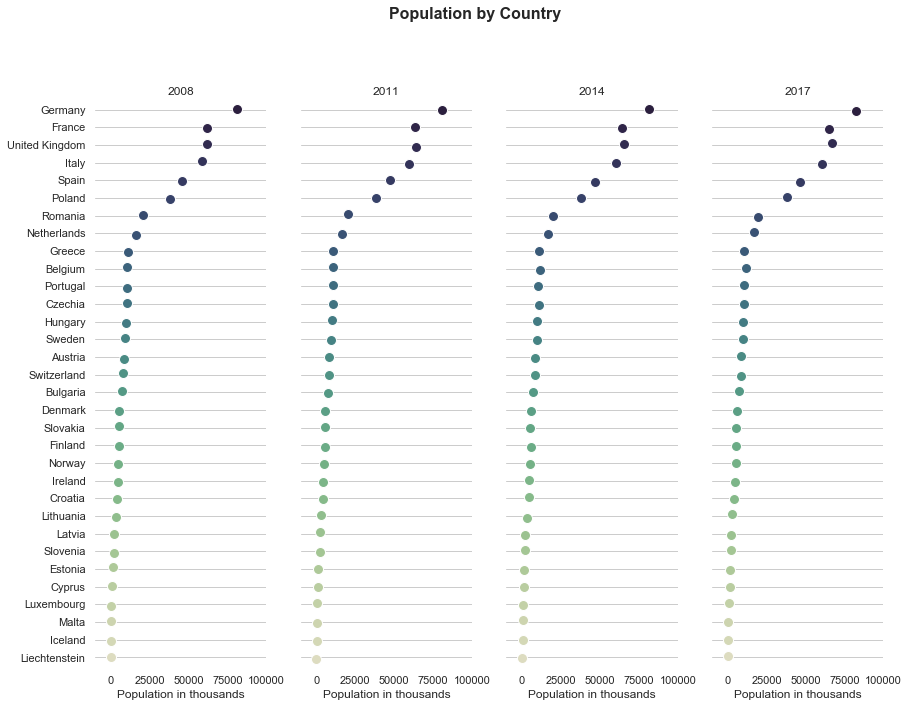

In [38]:
# Set up PairGrid
g = sns.PairGrid(data=dfi_pop.sort_values('2008', ascending=False),
                x_vars=dfi_pop.columns[1:], y_vars=['index'],
                height=10, aspect=0.3)

# Create stripplot
g.map(sns.stripplot, size=10, orient='h', palette=sns.cubehelix_palette(32, start=0.5, rot=-0.8, reverse=True),
     linewidth=1, edgecolor='w')

# Set x-axis limits on all columns
g.set(xlim=(-10000, 100000), xlabel="Population in thousands", ylabel="")

# Column titles
titles = ['2008', '2011', '2014', '2017']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Population by Country', size=16, weight='demi')

sns.despine(left=True, bottom=True);

In [39]:
# Pivot data to long-form for visual analysis
dfg_pop = df_to_longform(df_pop, 'pop_in_thous')

dfg = pd.merge(dfg, dfg_pop, on=['country', 'year'])

dfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 319
Data columns (total 6 columns):
country                  320 non-null object
year                     320 non-null object
immigrants               320 non-null float64
emigrants                320 non-null float64
reporting_country_emi    320 non-null float64
pop_in_thous             320 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 17.5+ KB


In [40]:
# Create immigrants/emigrants per capita data
dfg['immigrants_per_capita'] = dfg['immigrants']/dfg['pop_in_thous']
dfg['emigrants_per_capita'] = dfg['emigrants']/dfg['pop_in_thous']

dfg.head()

,country,year,immigrants,emigrants,reporting_country_emi,pop_in_thous,immigrants_per_capita,emigrants_per_capita
0,Austria,2008,73772.0,51563.0,18168.0,8341,8.844503,6.181873
1,Austria,2009,69295.0,53244.0,16376.0,8372,8.276995,6.359771
2,Austria,2010,70978.0,51651.0,16059.0,8409,8.440718,6.142347
3,Austria,2011,82230.0,51197.0,14401.0,8453,9.727907,6.056666
4,Austria,2012,91557.0,51812.0,15443.0,8502,10.768878,6.094096


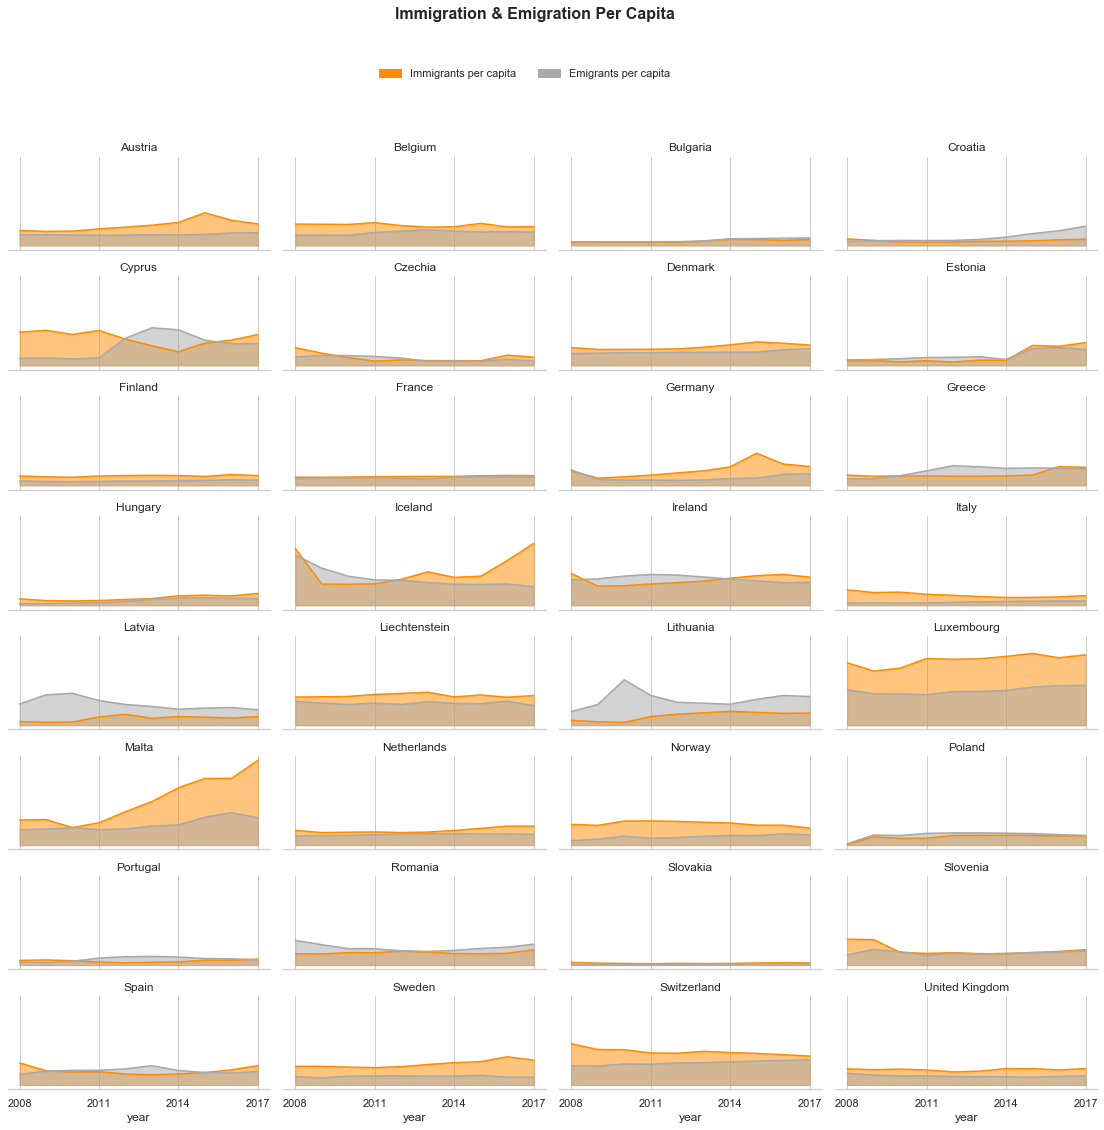

In [41]:
# Initialize FacetGrid object
g = sns.FacetGrid(dfg, col='country', col_wrap=4, 
                  height=2, aspect=2).set(xticks=np.arange(0,10,3))

# Create immigration plot - set for immigrants
g.map(plt.plot, 'year', 'immigrants_per_capita', color='darkorange')
g.map(plt.fill_between, 'year', 'immigrants_per_capita',  color='darkorange', alpha=0.5)

g.map(plt.plot, 'year', 'emigrants_per_capita', color='darkgrey')
g.map(plt.fill_between, 'year', 'emigrants_per_capita',  color='darkgrey', alpha=0.5)

# Facet titles
for ax in g.axes:
    g.set_titles("{col_name}")
    g.set_axis_labels(y_var= '')

# Formatting axes
g.set(yticks=[])
g.despine(left=True)

# Legend
color_key = {'Immigrants per capita': 'darkorange',
            'Emigrants per capita' : 'darkgrey'}

patches =  [pat.Patch(color=v, label=k) for k,v in color_key.items()]

g.fig.legend(handles=patches, bbox_to_anchor =
             [0.59, 0.93], ncol=2).get_frame().set_edgecolor('1.0')

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Immigration & Emigration Per Capita', size=16, weight='demi');

In [42]:
# GDP IN MILLION EUROS DATA
# https://ec.europa.eu/eurostat/cache/metadata/en/nama10_esms.htm
df_gdp = clean_eurostat_excel('nama_10_gdp.xlsx','GDP_million_euro')

df_gdp2 = df_gdp.drop(['2010', '2011', '2012', '2014', '2015', '2016', '2018'],axis=1)

df_gdp2 = df_gdp2.reset_index()

df_gdp2 = df_gdp2.rename(columns = {'index':'country'})

df_gdp2.head()

,country,2009,2013,2017
0,Belgium,348781.1,392339.8,439174.5
1,Bulgaria,37317.7,41858.1,51663.0
2,Czechia,148682.0,157741.6,191721.8
3,Denmark,231278.0,258742.7,292806.1
4,Germany,2445730.0,2811350.0,3244990.0


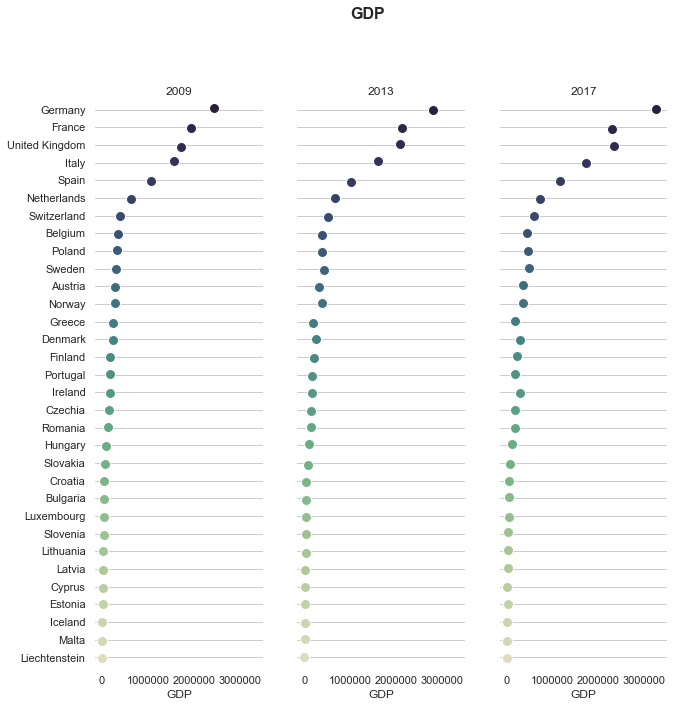

In [43]:
# Style
sns.set(style='whitegrid')

# Set up PairGrid
g = sns.PairGrid(data=df_gdp2.sort_values('2009', ascending=False),
                x_vars=df_gdp2.columns[1:], y_vars=['country'],
                height=10, aspect=0.3)

# Create stripplot
g.map(sns.stripplot, size=10, orient='h', palette=sns.cubehelix_palette(32, start=0.5, rot=-0.8, reverse=True),
     linewidth=1, edgecolor='w')

# Set x-axis limits on all columns
g.set(xlim=(-150000, 3500000), xlabel="GDP", ylabel="")

# Column titles
titles =['2009', '2013', '2017']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('GDP', size=16, weight='demi');

In [44]:
# Pivot data to long-form for visual analysis
dfg_gdp = df_to_longform(df_gdp, 'GDP')

# merge population and GDP data
dfg = pd.merge(dfg, dfg_gdp, on=['country', 'year'])

dfg.head()

,country,year,immigrants,emigrants,reporting_country_emi,pop_in_thous,immigrants_per_capita,emigrants_per_capita,GDP
0,Austria,2009,69295.0,53244.0,16376.0,8372,8.276995,6.359771,288044.0
1,Austria,2010,70978.0,51651.0,16059.0,8409,8.440718,6.142347,295896.6
2,Austria,2011,82230.0,51197.0,14401.0,8453,9.727907,6.056666,310128.7
3,Austria,2012,91557.0,51812.0,15443.0,8502,10.768878,6.094096,318653.0
4,Austria,2013,101866.0,54071.0,15368.0,8556,11.905797,6.319659,323910.2


In [45]:
# Create GDP per capita variable
dfg['GDP_pc'] = dfg['GDP']/dfg['pop_in_thous']

dfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 287
Data columns (total 10 columns):
country                  288 non-null object
year                     288 non-null object
immigrants               288 non-null float64
emigrants                288 non-null float64
reporting_country_emi    288 non-null float64
pop_in_thous             288 non-null int64
immigrants_per_capita    288 non-null float64
emigrants_per_capita     288 non-null float64
GDP                      288 non-null float64
GDP_pc                   288 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 24.8+ KB


In [46]:
# Pivot data into wide-form for graphing
df_gdp_pc = dfg.pivot(index='country', columns='year')['GDP_pc'].reset_index()

df_gdp_pc = df_gdp_pc.drop(['2010', '2011', '2012', '2014', '2015', '2016'], axis=1)

df_gdp_pc.head()

year,country,2009,2013,2017
0,Austria,34.405638,37.857667,41.988411
1,Belgium,32.119081,35.174807,38.459979
2,Bulgaria,4.993671,5.741852,7.274430
3,Croatia,10.399770,10.238354,11.714371
4,Cyprus,17.008652,15.743657,16.997201


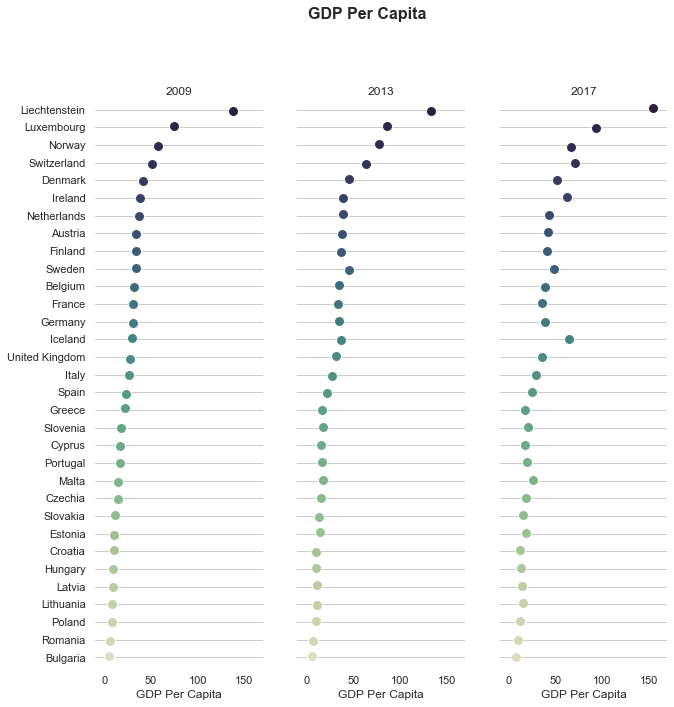

In [47]:
# Style
sns.set(style='whitegrid')

# Set up PairGrid
g = sns.PairGrid(data=df_gdp_pc.sort_values('2009', ascending=False),
                x_vars=df_gdp_pc.columns[1:], y_vars=['country'],
                height=10, aspect=0.3)

# Create stripplot
g.map(sns.stripplot, size=10, orient='h', palette=sns.cubehelix_palette(32, start=0.5, rot=-0.8, reverse=True),
     linewidth=1, edgecolor='w')

# Set x-axis limits on all columns
g.set(xlim=(-10, 170), xlabel="GDP Per Capita", ylabel="")

# Column titles
titles =['2009', '2013', '2017']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('GDP Per Capita', size=16, weight='demi');

In [48]:
# Create variables immigrants/emigrants per GDP
dfg['immigrants_per_GDP'] = dfg['immigrants']/dfg['GDP']
dfg['emigrants_per_GDP'] = dfg['emigrants']/dfg['GDP']

dfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 287
Data columns (total 12 columns):
country                  288 non-null object
year                     288 non-null object
immigrants               288 non-null float64
emigrants                288 non-null float64
reporting_country_emi    288 non-null float64
pop_in_thous             288 non-null int64
immigrants_per_capita    288 non-null float64
emigrants_per_capita     288 non-null float64
GDP                      288 non-null float64
GDP_pc                   288 non-null float64
immigrants_per_GDP       288 non-null float64
emigrants_per_GDP        288 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 29.2+ KB


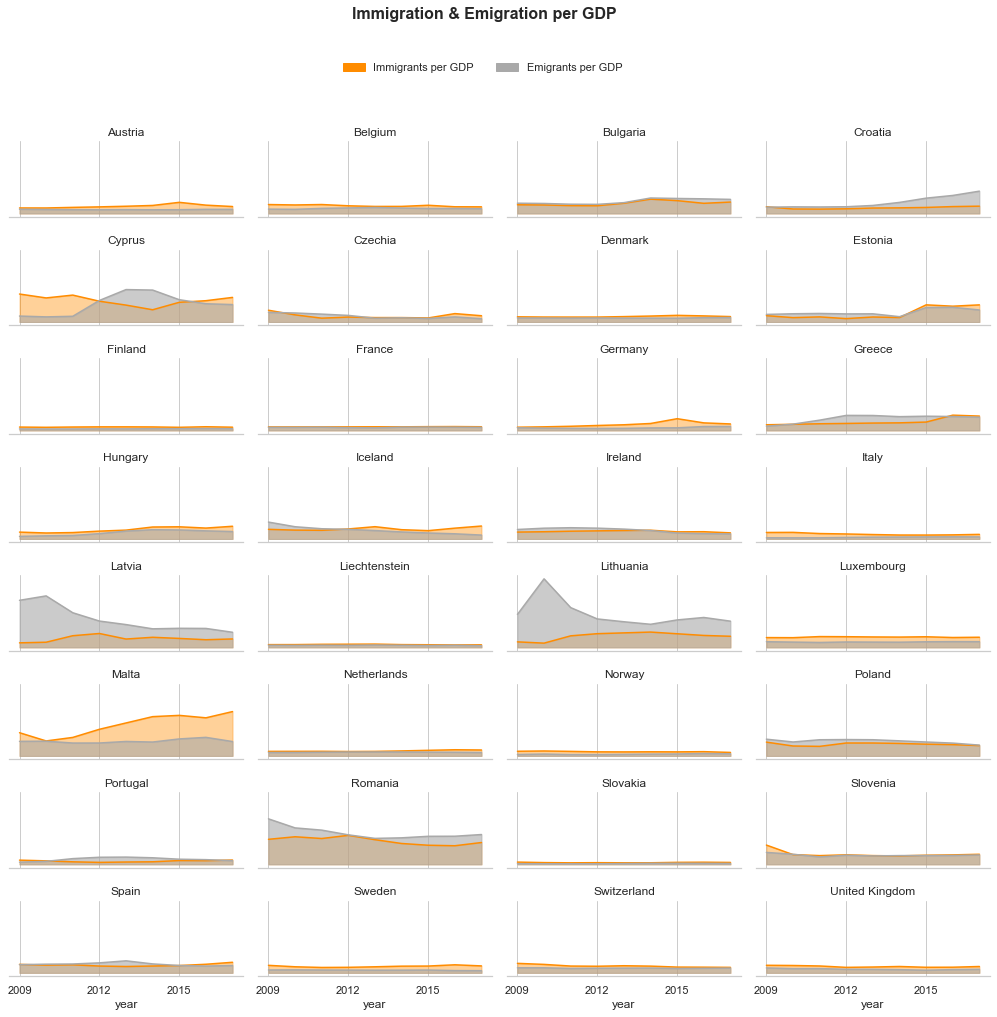

In [49]:
# Initialize FacetGrid object
g = sns.FacetGrid(dfg, col='country', col_wrap=4, height=1.8,
                  aspect=2).set(xticks=np.arange(0,10,3))

# Create immigration plot - set for immigrants
g.map(plt.plot, 'year', 'immigrants_per_GDP', color='darkorange')
g.map(plt.fill_between, 'year', 'immigrants_per_GDP',  color='darkorange', alpha=0.4)

g.map(plt.plot, 'year', 'emigrants_per_GDP', color='darkgrey')
g.map(plt.fill_between, 'year', 'emigrants_per_GDP',  color='darkgrey', alpha=0.6)

# Facet titles
for ax in g.axes:
    g.set_titles("{col_name}")
    g.set_axis_labels(y_var= '')

# Formatting axes
g.set(yticks=[])
g.despine(left=True)

# Legend
color_key = {'Immigrants per GDP': 'darkorange',
            'Emigrants per GDP' : 'darkgrey'}

patches =  [pat.Patch(color=v, label=k) for k,v in color_key.items()]

g.fig.legend(handles=patches, bbox_to_anchor =
             [0.61, 0.93], ncol=2).get_frame().set_edgecolor('1.0')

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Immigration & Emigration per GDP', size=16, weight='demi');

### Maps of 2015 Immigration to the EU

In [50]:
import geopandas

# GEOJSON POLYGON COUNTRY DATA
# https://datahub.io/core/geo-countries
world_map = geopandas.read_file('countries.geojson')

world_map.head()

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."


In [51]:
type(world_map)

geopandas.geodataframe.GeoDataFrame

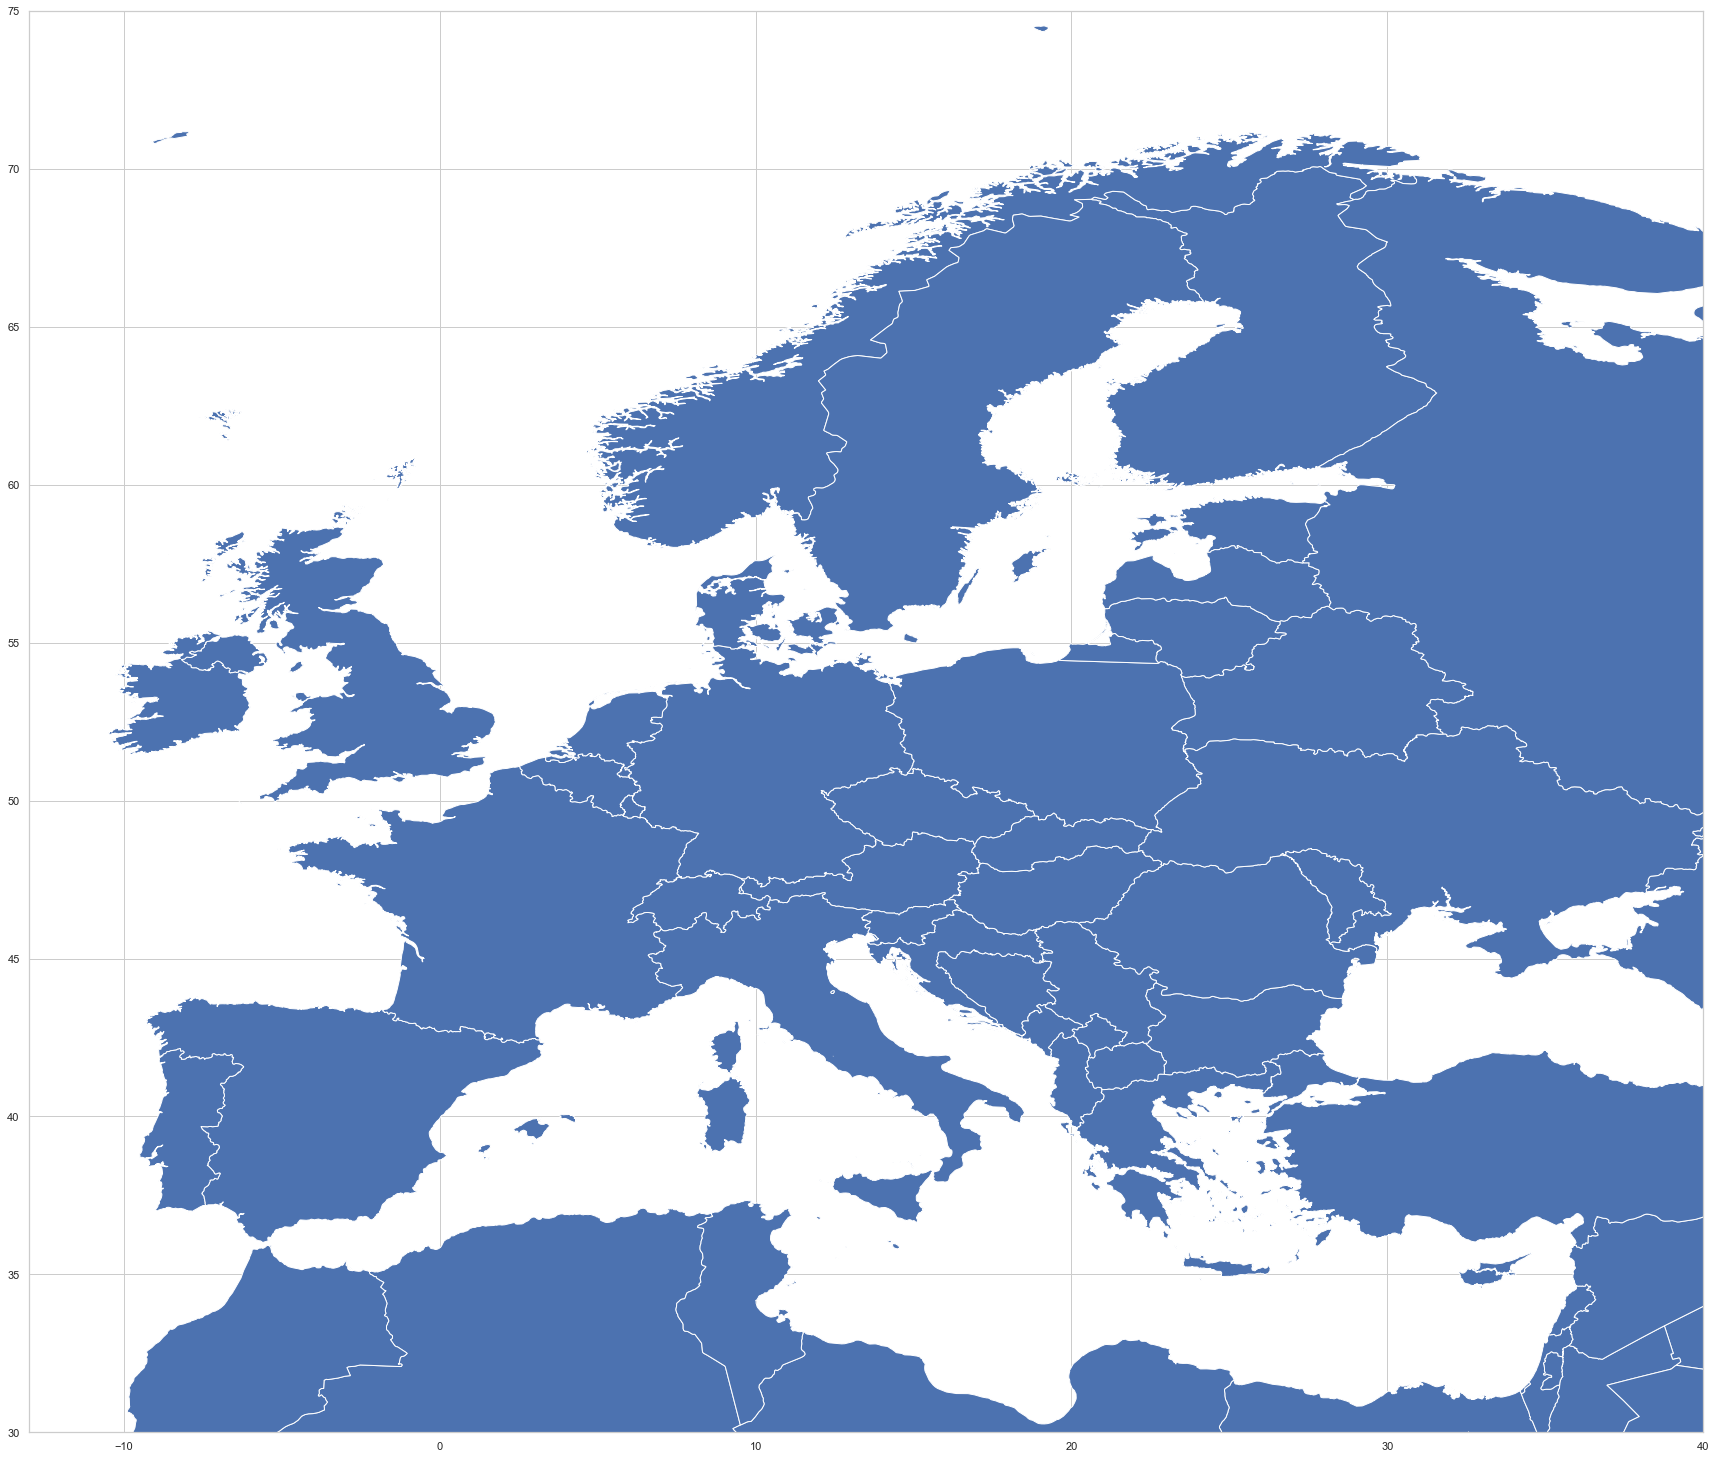

In [52]:
# Exploring map axes
world_map.plot(figsize=(30,30))
plt.axis([-13,40,30,75]);

In [53]:
# Check if country lists of data and maps match
diff = list(set(countries) - set(world_map['ADMIN']))

diff

['Czechia']

In [54]:
# Find outlier
world_map[world_map['ADMIN'].str.startswith('Cz')]

,ADMIN,ISO_A3,geometry
60,Czech Republic,CZE,"POLYGON ((14.39781 51.01311, 14.42582 51.02094..."


In [55]:
# Rename outlier to match data with map
world_map.iat[60,0] = 'Czechia'

world_map[world_map['ADMIN'].str.startswith('Cz')]

,ADMIN,ISO_A3,geometry
60,Czechia,CZE,"POLYGON ((14.39781 51.01311, 14.42582 51.02094..."


In [56]:
diff = list(set(countries) - set(world_map['ADMIN']))

diff

[]

In [57]:
# Map data for total immigrants
europe_map_imm = pd.merge(world_map, df_imm_total, left_on=['ADMIN'], right_index=True)

europe_map_imm

,ADMIN,ISO_A3,geometry,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
16,Austria,AUT,"POLYGON ((15.16179 48.93722, 15.23807 48.95076...",73772.0,69295.0,70978.0,82230.0,91557.0,101866.0,116262.0,166323.0,129509.0,111801.0
19,Belgium,BEL,"POLYGON ((4.81545 51.43107, 4.82268 51.41368, ...",135281.0,135281.0,135281.0,147377.0,129477.0,120078.0,123158.0,146626.0,123702.0,126703.0
23,Bulgaria,BGR,"POLYGON ((22.91956 43.83422, 23.05255 43.84282...",14103.0,14103.0,14103.0,14103.0,14103.0,18570.0,26615.0,25223.0,21241.0,25597.0
40,Switzerland,CHE,"POLYGON ((8.61744 47.75732, 8.62984 47.76280, ...",184297.0,160623.0,161778.0,148799.0,149051.0,160157.0,156282.0,153627.0,149305.0,143377.0
59,Cyprus,CYP,"MULTIPOLYGON (((33.77399 34.98867, 33.77792 34...",21060.0,22581.0,20206.0,23037.0,17476.0,13149.0,9212.0,15183.0,17391.0,21306.0
60,Czechia,CZE,"POLYGON ((14.39781 51.01311, 14.42582 51.02094...",108267.0,75620.0,48317.0,27114.0,34337.0,30124.0,29897.0,29602.0,64083.0,51847.0
61,Germany,DEU,"MULTIPOLYGON (((6.74220 53.57836, 6.74952 53.5...",682146.0,346216.0,404055.0,489422.0,592175.0,692713.0,884893.0,1543848.0,1029852.0,917109.0
64,Denmark,DNK,"MULTIPOLYGON (((11.25603 54.95458, 11.30348 54...",57357.0,51800.0,52236.0,52833.0,54409.0,60312.0,68388.0,78492.0,74383.0,68579.0
71,Spain,ESP,"MULTIPOLYGON (((-17.88512 27.79792, -17.92642 ...",599075.0,392962.0,360705.0,371331.0,304053.0,280772.0,305454.0,342114.0,414746.0,532132.0
72,Estonia,EST,"MULTIPOLYGON (((23.27019 57.78563, 23.25025 57...",3671.0,3884.0,2810.0,3709.0,2639.0,4109.0,3904.0,15413.0,14822.0,17616.0


In [58]:
# Map data for immigrants per capita
df_imm_pc = dfg.pivot(index='country', columns='year')['immigrants_per_capita']

europe_map_imm_pc = pd.merge(world_map, df_imm_pc, left_on=['ADMIN'], right_index=True)

europe_map_imm_pc.head(1)

,ADMIN,ISO_A3,geometry,2009,2010,2011,2012,2013,2014,2015,2016,2017
16,Austria,AUT,"POLYGON ((15.16179 48.93722, 15.23807 48.95076...",8.276995,8.440718,9.727907,10.768878,11.905797,13.495299,19.166052,14.806105,12.677288


In [59]:
# Map data for immigrants per GDP
df_imm_gdp = dfg.pivot(index='country', columns='year')['immigrants_per_GDP']

europe_map_imm_pc = pd.merge(world_map, df_imm_gdp, left_on=['ADMIN'], right_index=True)

europe_map_imm_pc.head(1)

,ADMIN,ISO_A3,geometry,2009,2010,2011,2012,2013,2014,2015,2016,2017
16,Austria,AUT,"POLYGON ((15.16179 48.93722, 15.23807 48.95076...",0.240571,0.239874,0.265148,0.287325,0.314488,0.348982,0.483119,0.362466,0.301923


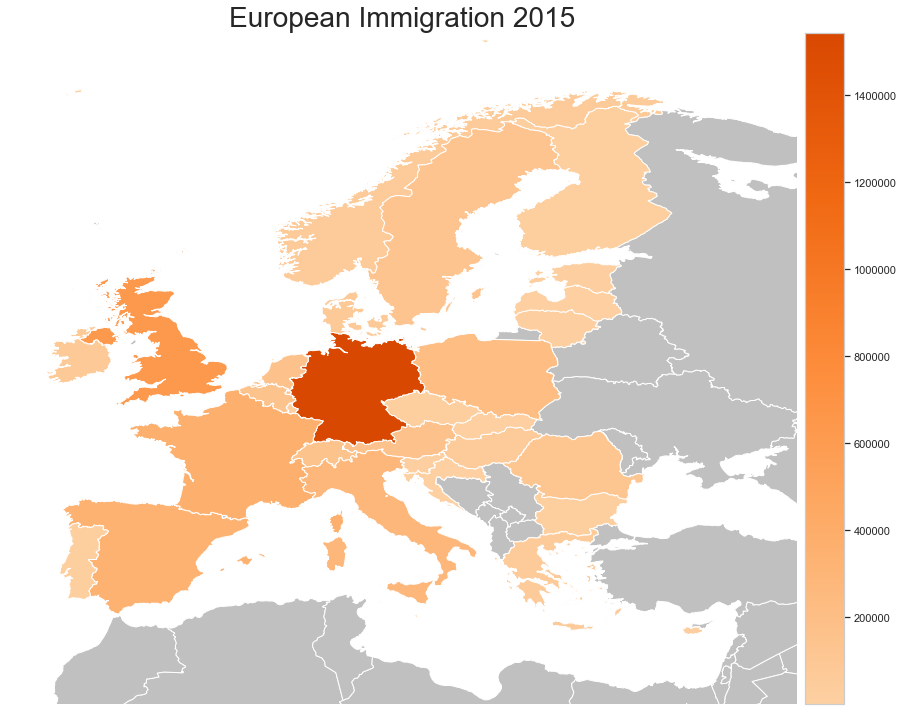

In [60]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set figure and axis
fig, ax = plt.subplots(1, figsize=(15,15))
plt.axis([-13,40,30,75])

# Colormap formatting
oranges_middle = cm.get_cmap('Oranges', 512)
Oranges2 = ListedColormap(oranges_middle(np.linspace(0.25, 0.75, 256)))

# Aligning map layers
ax.set_aspect('equal')
ax.axis('off')

# Legend formatting
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plots
world_map.plot(ax=ax, color='silver', edgecolor='white')

europe_map_imm.plot(ax=ax, column='2015', cmap=Oranges2, legend=True, cax=cax)

# Title
ax.set_title('European Immigration 2015', fontdict={'fontsize':'28', 'fontweight':'3'});


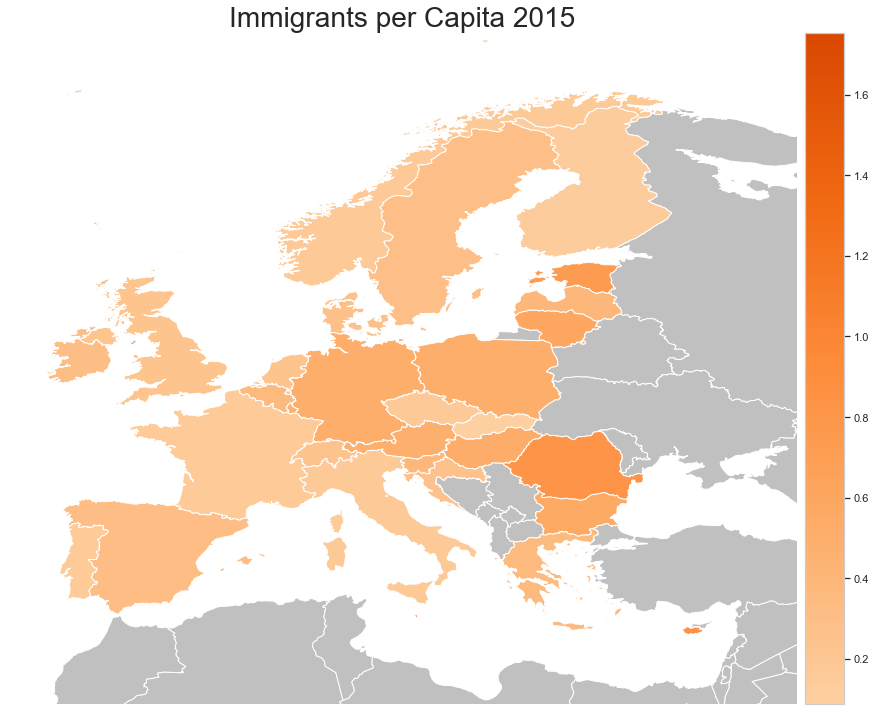

In [61]:
# Set figure and axis
fig, ax = plt.subplots(1, figsize=(15,15))
plt.axis([-13,40,30,75])

# Colormap formatting
oranges_middle = cm.get_cmap('Oranges', 512)
Oranges2 = ListedColormap(oranges_middle(np.linspace(0.25, 0.75, 256)))

# Aligning map layers
ax.set_aspect('equal')
ax.axis('off')

# Legend formatting
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plots
world_map.plot(ax=ax, color='silver', edgecolor='white')

europe_map_imm_pc.plot(ax=ax, column='2015', cmap=Oranges2, legend=True, cax=cax)

# Title
ax.set_title('Immigrants per Capita 2015', fontdict={'fontsize':'28', 'fontweight':'3'});


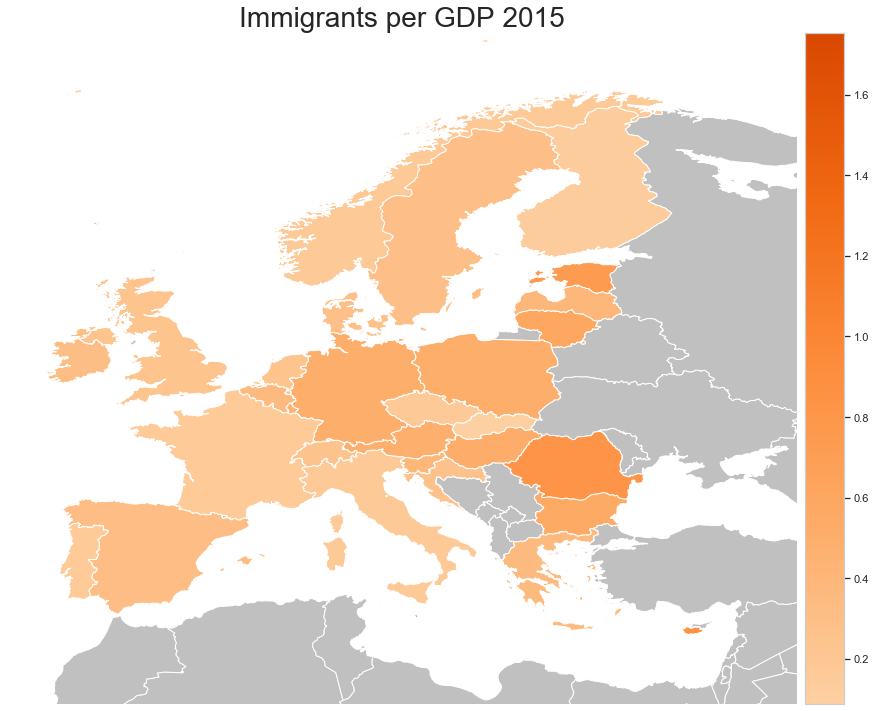

In [62]:
# Set figure and axis
fig, ax = plt.subplots(1, figsize=(15,15))
plt.axis([-13,40,30,75])

# Colormap formatting
oranges_middle = cm.get_cmap('Oranges', 512)
Oranges2 = ListedColormap(oranges_middle(np.linspace(0.25, 0.75, 256)))

# Aligning map layers
ax.set_aspect('equal')
ax.axis('off')

# Legend formatting
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plots
world_map.plot(ax=ax, color='silver', edgecolor='white')
europe_map_imm_pc.plot(ax=ax, column='2015', cmap=Oranges2, legend=True, cax=cax)

# Title
ax.set_title('Immigrants per GDP 2015', fontdict={'fontsize':'28', 'fontweight':'3'});


## Asylum seekers

In [63]:
# ASYLUM APPLICATIONS DATA 
# https://ec.europa.eu/eurostat/cache/metadata/en/migr_asyapp_esms.htm
df_asylum = clean_eurostat_excel('migr_asylum_apps.xlsx', 'Data')

dfg_asylum = df_to_longform(df_asylum, 'asylum_apps')

# Explore remaining missing values
dfg_asylum[dfg_asylum.isnull().sum(axis=1) > 0]

,country,year,asylum_apps


In [64]:
df_asylum.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Belgium,21615.0,26080.0,31910.0,28075.0,21030.0,22710.0,44660.0,18280.0,18340.0,22530.0
Bulgaria,855.0,1025.0,890.0,1385.0,7145.0,11080.0,20390.0,19420.0,3695.0,2535.0
Czechia,1235.0,775.0,750.0,740.0,695.0,1145.0,1515.0,1475.0,1445.0,1690.0
Denmark,3720.0,5065.0,3945.0,6045.0,7170.0,14680.0,20935.0,6180.0,3220.0,3570.0
Germany,32910.0,48475.0,53235.0,77485.0,126705.0,202645.0,476510.0,745155.0,222560.0,184180.0


In [65]:
# ASYLUM DECISIONS, OUTGOING
# https://ec.europa.eu/eurostat/cache/metadata/en/migr_dub_esms.htm
df_asyl_accepted_outgoing = clean_eurostat_excel('migr_dubdo.xlsx', 'Accepted - outgoing')

dfg_asyl_accepted_outgoing = df_to_longform(df_asyl_accepted_outgoing, 'asylum_accepted_outgoing')

# ASYLUM DECISIONS, INCOMING
# https://ec.europa.eu/eurostat/cache/metadata/en/migr_dub_esms.htm
df_asyl_accepted_incoming = clean_eurostat_excel('migr_dubdi.xlsx', 'Accepted - incoming')

dfg_asyl_accepted_incoming = df_to_longform(df_asyl_accepted_incoming, 'asylum_accepted_incoming')

# Explore remaining missing values
print(dfg_asyl_accepted_incoming[dfg_asyl_accepted_incoming.isnull().sum(axis=1) > 0])
print(dfg_asyl_accepted_outgoing[dfg_asyl_accepted_outgoing.isnull().sum(axis=1) > 0])

Empty DataFrame
Columns: [country, year, asylum_accepted_incoming]
Index: []
Empty DataFrame
Columns: [country, year, asylum_accepted_outgoing]
Index: []


In [66]:
# Merge multiple into graphing dataframe
dfs = [dfg, dfg_asylum, dfg_asyl_accepted_outgoing, dfg_asyl_accepted_incoming]

dfg = reduce(lambda left, right: pd.merge(left, right, on=['country', 'year'],
                                        how='inner'), dfs)     

dfg.info()
dfg.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 287
Data columns (total 15 columns):
country                     288 non-null object
year                        288 non-null object
immigrants                  288 non-null float64
emigrants                   288 non-null float64
reporting_country_emi       288 non-null float64
pop_in_thous                288 non-null int64
immigrants_per_capita       288 non-null float64
emigrants_per_capita        288 non-null float64
GDP                         288 non-null float64
GDP_pc                      288 non-null float64
immigrants_per_GDP          288 non-null float64
emigrants_per_GDP           288 non-null float64
asylum_apps                 288 non-null float64
asylum_accepted_outgoing    288 non-null float64
asylum_accepted_incoming    288 non-null float64
dtypes: float64(12), int64(1), object(2)
memory usage: 36.0+ KB


,country,year,immigrants,emigrants,reporting_country_emi,pop_in_thous,immigrants_per_capita,emigrants_per_capita,GDP,GDP_pc,immigrants_per_GDP,emigrants_per_GDP,asylum_apps,asylum_accepted_outgoing,asylum_accepted_incoming
0,Austria,2009,69295.0,53244.0,16376.0,8372,8.276995,6.359771,288044.0,34.405638,0.240571,0.184847,15780.0,4632.0,1313.0


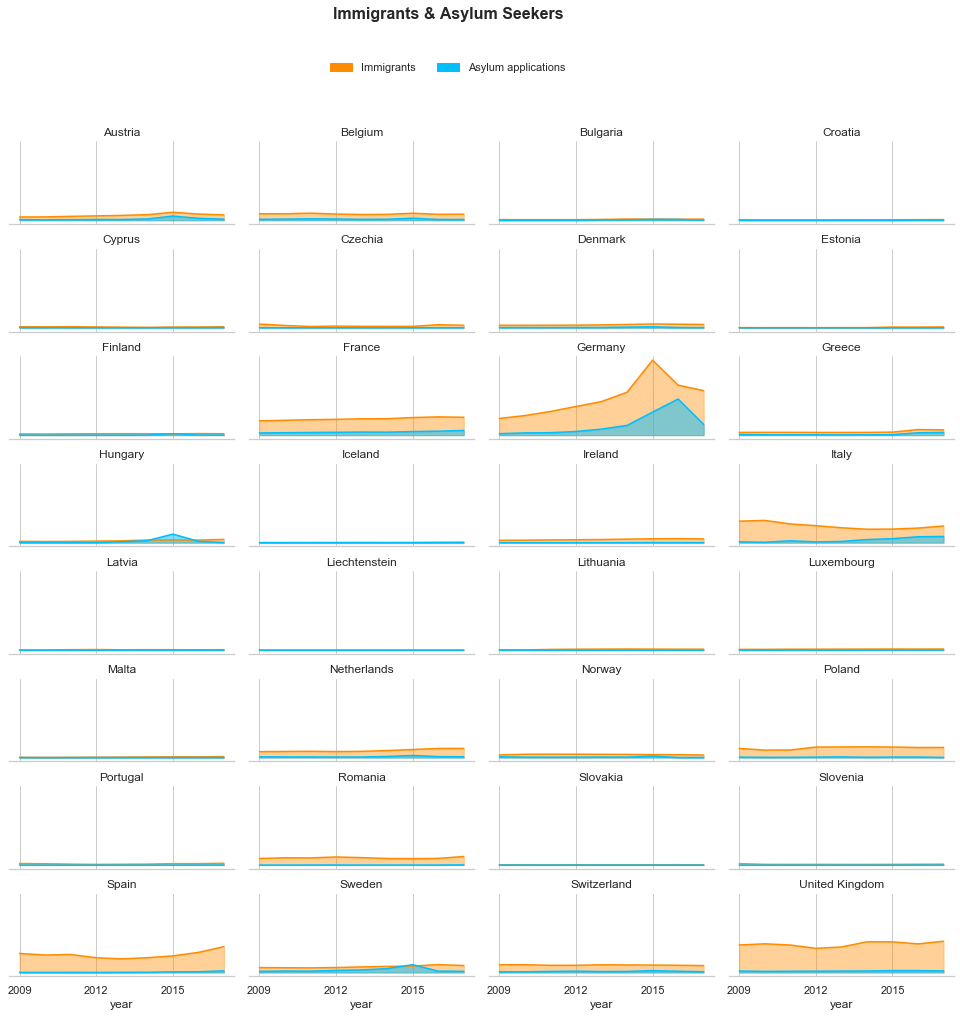

In [111]:
# Initialize FacetGrid object
g = sns.FacetGrid(dfg, col='country', col_wrap=4, height=1.8,
                  aspect=2).set(xticks=np.arange(0,10,3))


# Create immigration plot - set for immigrants
g.map(plt.plot, 'year', 'immigrants', color='darkorange')
g.map(plt.fill_between, 'year', 'immigrants',  color='darkorange', alpha=0.4)

g.map(plt.plot, 'year', 'asylum_apps', color='deepskyblue')
g.map(plt.fill_between, 'year', 'asylum_apps',  color='deepskyblue', alpha=0.5)

# Facet titles
for ax in g.axes:
    g.set_titles("{col_name}")
    g.set_axis_labels(y_var= '')

# Formatting axes
g.set(yticks=[])
g.despine(left=True)

# Legend
color_key = {'Immigrants': 'darkorange',
            'Asylum applications' : 'deepskyblue'}

patches =  [pat.Patch(color=v, label=k) for k,v in color_key.items()]

g.fig.legend(handles=patches, bbox_to_anchor =
             [0.555, 0.93], ncol=2).get_frame().set_edgecolor('1.0')

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Immigrants & Asylum Seekers', size=16, weight='demi');

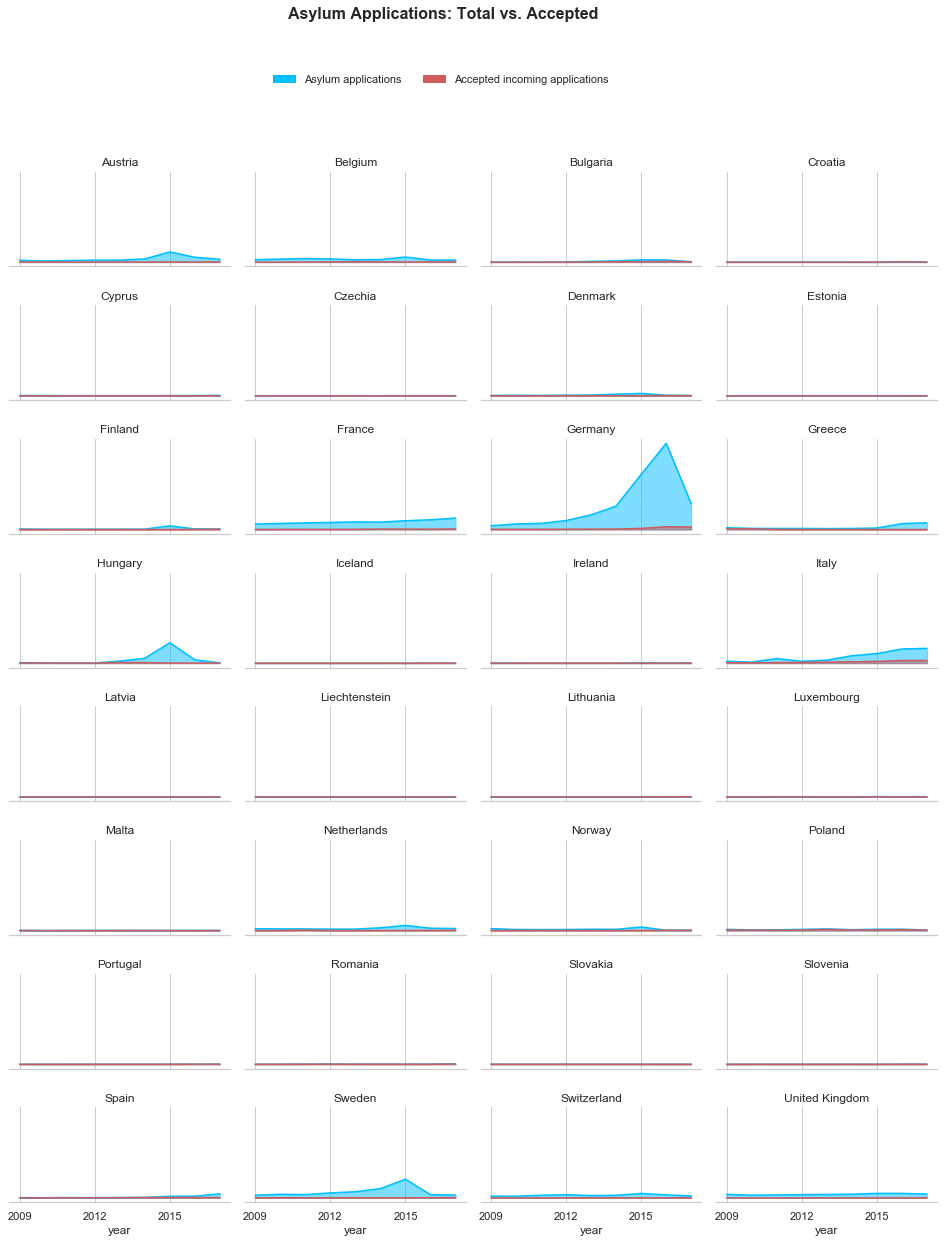

In [68]:
# Initialize FacetGrid object
g = sns.FacetGrid(dfg, col='country', col_wrap=4, height=2.2,
                  aspect=1.6).set(xticks=np.arange(0,10,3))

# Create immigration plot - set for immigrants
g.map(plt.plot, 'year', 'asylum_apps', color='deepskyblue')
g.map(plt.fill_between, 'year', 'asylum_apps',  color='deepskyblue', alpha=0.5)

g.map(plt.plot, 'year', 'asylum_accepted_incoming', color='indianred')
g.map(plt.fill_between, 'year', 'asylum_accepted_incoming',  color='indianred', alpha=0.5)


# Facet titles
for ax in g.axes:
    g.set_titles("{col_name}")
    g.set_axis_labels(y_var= '')

# Formatting axes
g.set(yticks=[])
g.despine(left=True)

# Legend
color_key = {'Asylum applications' : 'deepskyblue',
            'Accepted incoming applications': 'indianred'}

patches =  [pat.Patch(color=v, label=k) for k,v in color_key.items()]

g.fig.legend(handles=patches, bbox_to_anchor =
             [0.61, 0.93], ncol=2).get_frame().set_edgecolor('1.0')

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Asylum Applications: Total vs. Accepted', size=16, weight='demi');

In [69]:
# Group by country and year for graphing
dfg_grouped_country = dfg.groupby(['country']).sum().reset_index()

dfg_grouped_year = dfg.groupby(['year']).sum().reset_index()

In [70]:
# Split by-country dataframe for clearer graphing
dfg_grouped_country['250k+'] =  dfg_grouped_country['asylum_apps'] > 250000
dfg_grouped_country['50k+'] =  dfg_grouped_country['asylum_apps'] > 50000


dfg_grouped_country.sort_values('asylum_apps', ascending=False, inplace=True)

In [71]:
# Create sub-dataframes
dfg_grouped_country_lar = dfg_grouped_country.loc[dfg_grouped_country['250k+'] == True]
dfg_grouped_country_med = dfg_grouped_country.loc[(dfg_grouped_country['50k+'] == True) & 
                                                    (dfg_grouped_country['250k+'] == False)]
dfg_grouped_country_sma = dfg_grouped_country.loc[dfg_grouped_country['50k+'] == False]

dfg_grouped_country_sma.head()

,country,immigrants,emigrants,reporting_country_emi,pop_in_thous,immigrants_per_capita,emigrants_per_capita,GDP,GDP_pc,immigrants_per_GDP,emigrants_per_GDP,asylum_apps,asylum_accepted_outgoing,asylum_accepted_incoming,250k+,50k+
4,Cyprus,159541.0,128535.0,11726.0,10273,140.153953,111.826015,169472.3,148.561578,8.408607,6.945920,22285.0,48.0,597.0,False,False
14,Ireland,605093.0,653568.0,344522.0,41588,130.661141,141.587784,1889902.8,407.817655,2.922393,3.319156,17705.0,2380.0,1404.0,False,False
25,Romania,1338046.0,1789463.0,1746033.0,181212,66.494560,88.896998,1328163.0,66.110154,9.209726,12.307166,17070.0,1430.0,5387.0,False,False
20,Malta,105171.0,48184.0,10910.0,3825,245.048880,112.787062,74198.9,173.919521,12.046597,5.766017,15975.0,306.0,4628.0,False,False
19,Luxembourg,187959.0,100126.0,17300.0,4884,344.973515,183.540802,420936.4,772.681705,4.015598,2.135868,14775.0,3623.0,978.0,False,False


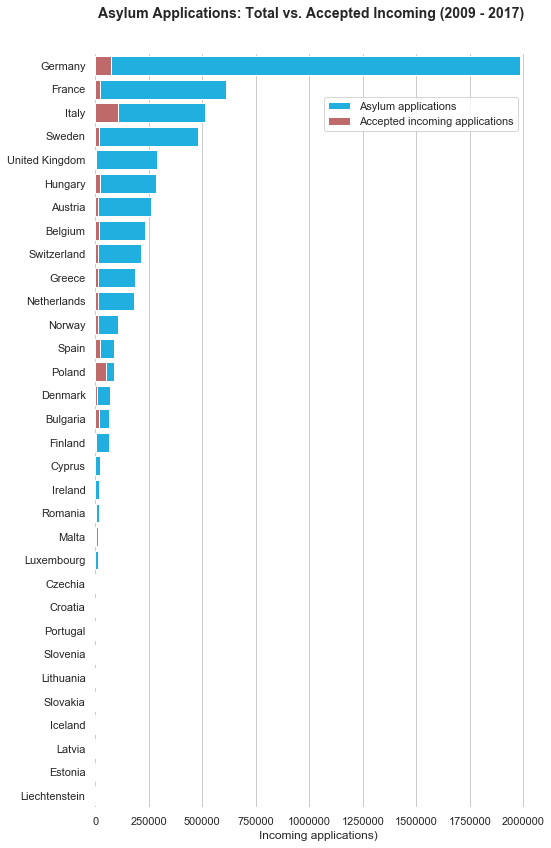

In [72]:
# Initialize figure
fig, ax = plt.subplots(figsize=(8, 13))

# Plot asylum apps
sns.barplot(data = dfg_grouped_country.sort_values('asylum_apps', ascending=False), x='asylum_apps', y='country',
            label='Asylum applications', color='deepskyblue', ci=None)

# Plot asylum apps accepted, incoming
sns.barplot(data = dfg_grouped_country.sort_values('asylum_apps', ascending=False), x='asylum_accepted_incoming', y='country',
            label='Accepted incoming applications', color="indianred", ci=None)

# Legend
ax.legend(bbox_to_anchor = [0.5, 0.95])

# Axis label
ax.set(ylabel='',
       xlabel='Incoming applications)')
sns.despine(left=True, bottom=True)

# Title
fig.subplots_adjust(top=0.93)
fig.suptitle('Asylum Applications: Total vs. Accepted Incoming (2009 - 2017)', size=14, weight='demi');

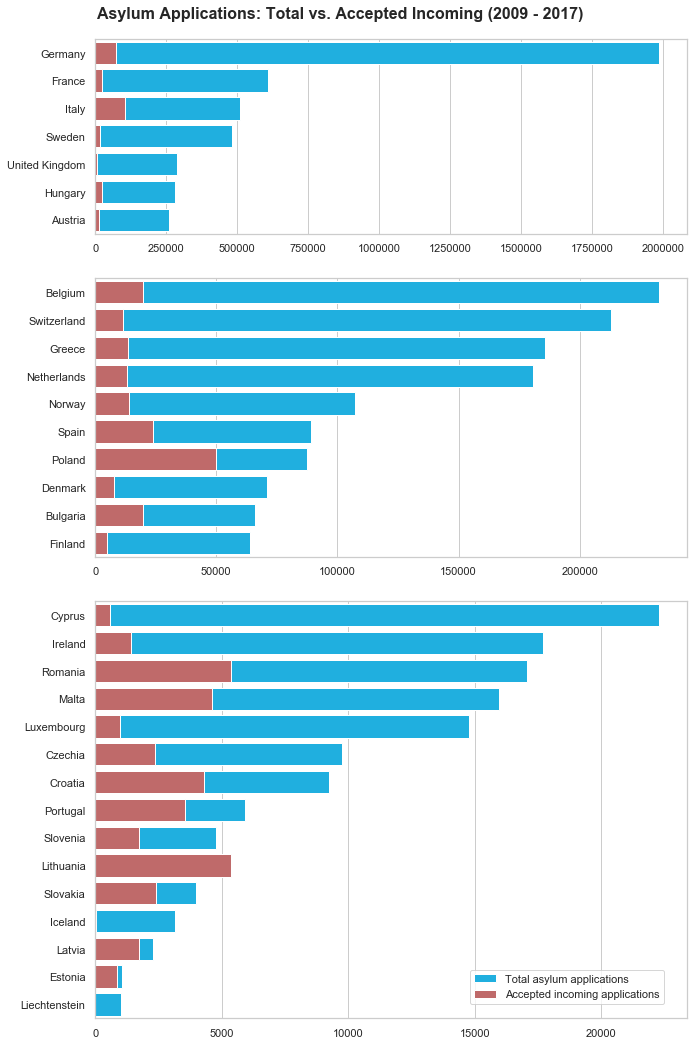

In [73]:
# Set figure and axes
fig, axs = plt.subplots(3, figsize=(10, 15), gridspec_kw={'height_ratios': [1, 1.43, 2.14]})

# Set style
sns.set_style('whitegrid')

# First subplot (>250k asylum apps)
sns.barplot(data = dfg_grouped_country_lar, y='country', x='asylum_apps',
            label='Total asylum applications', color="deepskyblue", ci=None, ax=axs[0])

sns.barplot(data = dfg_grouped_country_lar, y='country', x='asylum_accepted_incoming',
            label='Accepted incoming applications', color="indianred", ci=None, ax=axs[0])

# Second subplot(<250k asylum apps)
sns.barplot(data = dfg_grouped_country_med, y='country', x='asylum_apps',
            label='Total asylum applications', color="deepskyblue", ci=None, ax=axs[1])

sns.barplot(data = dfg_grouped_country_med, y='country', x='asylum_accepted_incoming',
            label='Accepted incoming applications', color="indianred", ci=None, ax=axs[1])

# Third subplot(<50k asylum apps)
sns.barplot(data = dfg_grouped_country_sma, y='country', x='asylum_apps',
            label='Total asylum applications', color="deepskyblue", ci=None, ax=axs[2])

sns.barplot(data = dfg_grouped_country_sma, y='country', x='asylum_accepted_incoming',
            label='Accepted incoming applications', color="indianred", ci=None, ax=axs[2])


# Formatting
fig.tight_layout()
axs[0].set(xlabel='', ylabel='')
axs[1].set(xlabel='', ylabel='')
axs[2].set(xlabel='', ylabel='')

# Legend
axs[2].legend(bbox_to_anchor = [0.97, 0.13])

# Title
plt.subplots_adjust(top=0.95)
fig.suptitle('Asylum Applications: Total vs. Accepted Incoming (2009 - 2017)', size=16, weight='demi');


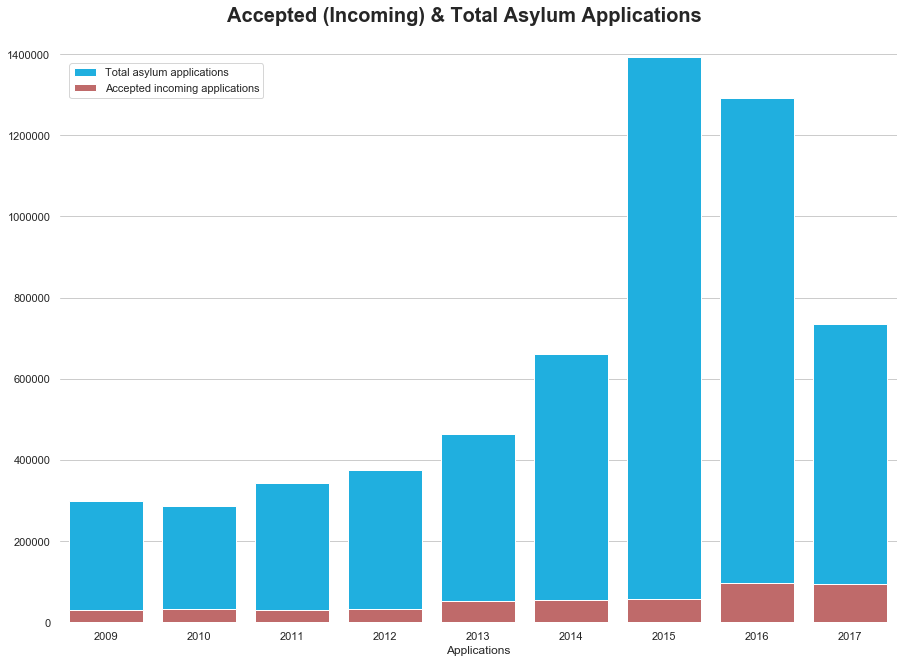

In [74]:
# Initialize figure
fig, ax = plt.subplots(figsize=(15, 10))

# Plot asylum apps
sns.set_color_codes("pastel")
sns.barplot(data = dfg_grouped_year, x='year', y='asylum_apps',
            label="Total asylum applications", color="deepskyblue", ci=None)

# Plot asylum apps accepted, incoming
sns.set_color_codes('muted')
sns.barplot(data = dfg_grouped_year, x='year', y='asylum_accepted_incoming',
            label="Accepted incoming applications", color="indianred", ci=None)

# Legend
ax.legend(bbox_to_anchor = [0.25, 0.95]) #loc='upper left'

# Axis labels
ax.set(ylabel='',xlabel='Applications')
sns.despine(left=True, bottom=True)

# Title
plt.subplots_adjust(top=0.95)
fig.suptitle('Accepted (Incoming) & Total Asylum Applications', size=20, weight='demi');

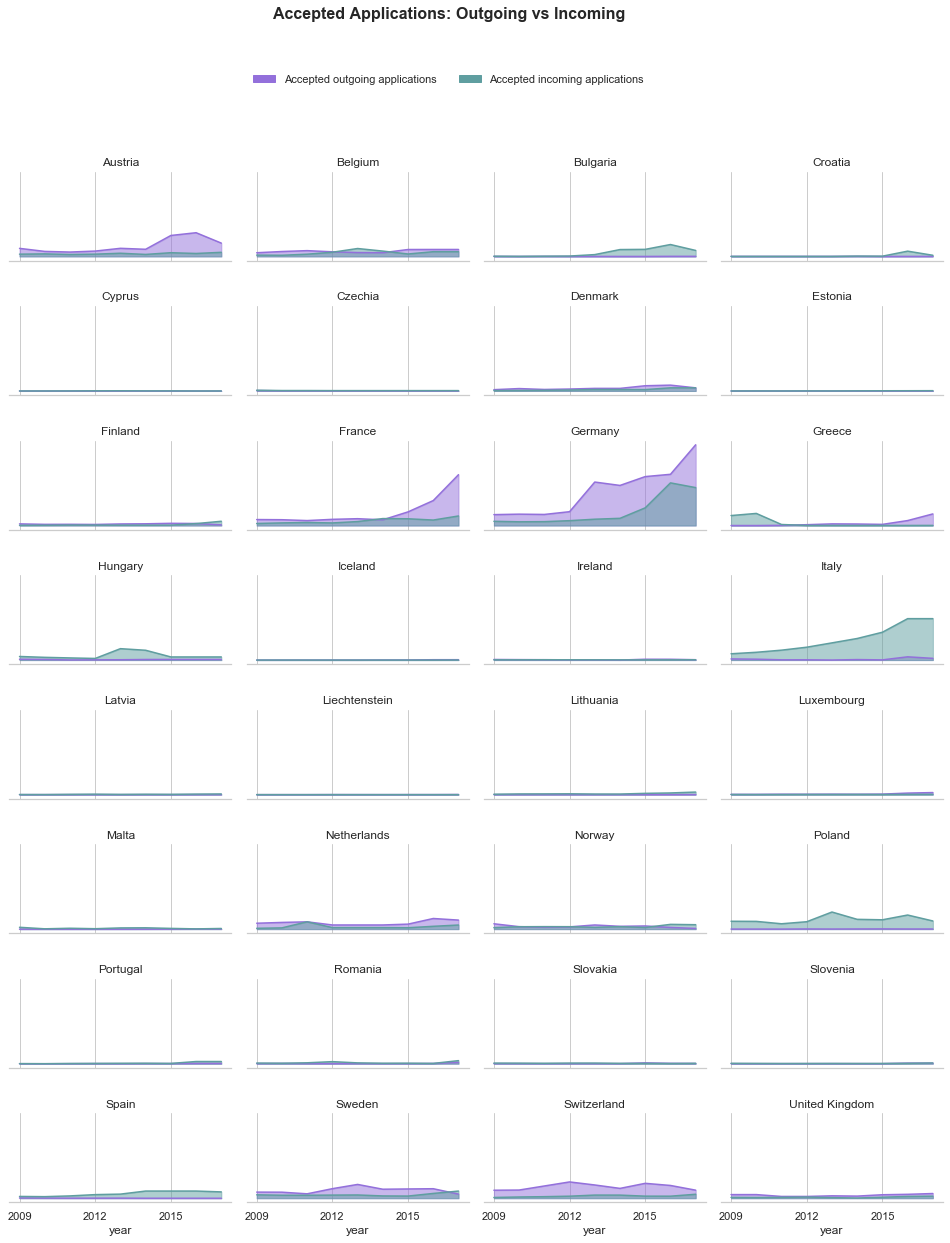

In [75]:
# Initialize FacetGrid object
g = sns.FacetGrid(dfg, col='country', col_wrap=4, height=2.2,
                  aspect=1.6).set(xticks=np.arange(0,10,3))

# Create immigration plot - set for immigrants
g.map(plt.plot, 'year', 'asylum_accepted_outgoing', color='mediumpurple')
g.map(plt.fill_between, 'year', 'asylum_accepted_outgoing',  color='mediumpurple', alpha=0.5)

g.map(plt.plot, 'year', 'asylum_accepted_incoming', color='cadetblue')
g.map(plt.fill_between, 'year', 'asylum_accepted_incoming',  color='cadetblue', alpha=0.5)


# Facet titles
for ax in g.axes:
    g.set_titles("{col_name}")
    g.set_axis_labels(y_var= '')

# Formatting axes
g.set(yticks=[])
g.despine(left=True)

# Legend
color_key = {'Accepted outgoing applications' : 'mediumpurple',
            'Accepted incoming applications': 'cadetblue'}

patches =  [pat.Patch(color=v, label=k) for k,v in color_key.items()]

g.fig.legend(handles=patches, bbox_to_anchor =
             [0.645, 0.93], ncol=2).get_frame().set_edgecolor('1.0')

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Accepted Applications: Outgoing vs Incoming', size=16, weight='demi');

In [76]:
# Create new variables for graphing
dfg['asylum_accepted_incoming_per_capita'] = dfg['asylum_accepted_incoming']/dfg['pop_in_thous']*1000
dfg['asylum_accepted_incoming_per_GDP'] = dfg['asylum_accepted_incoming']/dfg['GDP']*1000000

dfg.head()

,country,year,immigrants,emigrants,reporting_country_emi,pop_in_thous,immigrants_per_capita,emigrants_per_capita,GDP,GDP_pc,immigrants_per_GDP,emigrants_per_GDP,asylum_apps,asylum_accepted_outgoing,asylum_accepted_incoming,asylum_accepted_incoming_per_capita,asylum_accepted_incoming_per_GDP
0,Austria,2009,69295.0,53244.0,16376.0,8372,8.276995,6.359771,288044.0,34.405638,0.240571,0.184847,15780.0,4632.0,1313.0,156.832298,4558.331366
1,Austria,2010,70978.0,51651.0,16059.0,8409,8.440718,6.142347,295896.6,35.188084,0.239874,0.174558,11045.0,2895.0,1483.0,176.358663,5011.885909
2,Austria,2011,82230.0,51197.0,14401.0,8453,9.727907,6.056666,310128.7,36.688596,0.265148,0.165083,14420.0,2531.0,1136.0,134.390157,3662.995395
3,Austria,2012,91557.0,51812.0,15443.0,8502,10.768878,6.094096,318653.0,37.479769,0.287325,0.162597,17415.0,3084.0,1319.0,155.139967,4139.298861
4,Austria,2013,101866.0,54071.0,15368.0,8556,11.905797,6.319659,323910.2,37.857667,0.314488,0.166932,17500.0,4659.0,1846.0,215.755026,5699.110432


In [77]:
# Pivot data into wide-form for graphing
df_asylum_inc_pc = dfg.pivot(index='country', columns='year')['asylum_accepted_incoming_per_capita'].reset_index()
df_asylum_inc_pgdp = dfg.pivot(index='country', columns='year')['asylum_accepted_incoming_per_GDP'].reset_index()

df_asylum_inc_pc.head()

year,country,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Austria,156.832298,176.358663,134.390157,155.139967,215.755026,135.345328,247.752938,195.495598,269.078127
1,Belgium,71.185192,62.442860,117.860710,217.861976,407.566792,274.307103,125.897050,240.443896,239.075226
2,Bulgaria,19.269370,8.619529,19.788561,32.724298,147.187929,545.065562,564.661759,954.272130,484.511405
3,Croatia,9.675190,9.704251,9.738001,9.778813,9.822264,49.118684,40.642722,721.720532,163.318986
4,Cyprus,30.965392,30.575540,53.380783,99.559471,120.734908,69.444444,68.965517,18.803419,30.534351


In [78]:
df_asylum_inc_pc = df_asylum_inc_pc.drop(['2009', '2010', '2011', '2012'],axis=1)
df_asylum_inc_pgdp = df_asylum_inc_pgdp.drop(['2009', '2010', '2011', '2012'],axis=1)

df_asylum_inc_pc.max()

year
country    United Kingdom
2013              1699.53
2014              1830.23
2015              1041.57
2016              954.272
2017              924.485
dtype: object

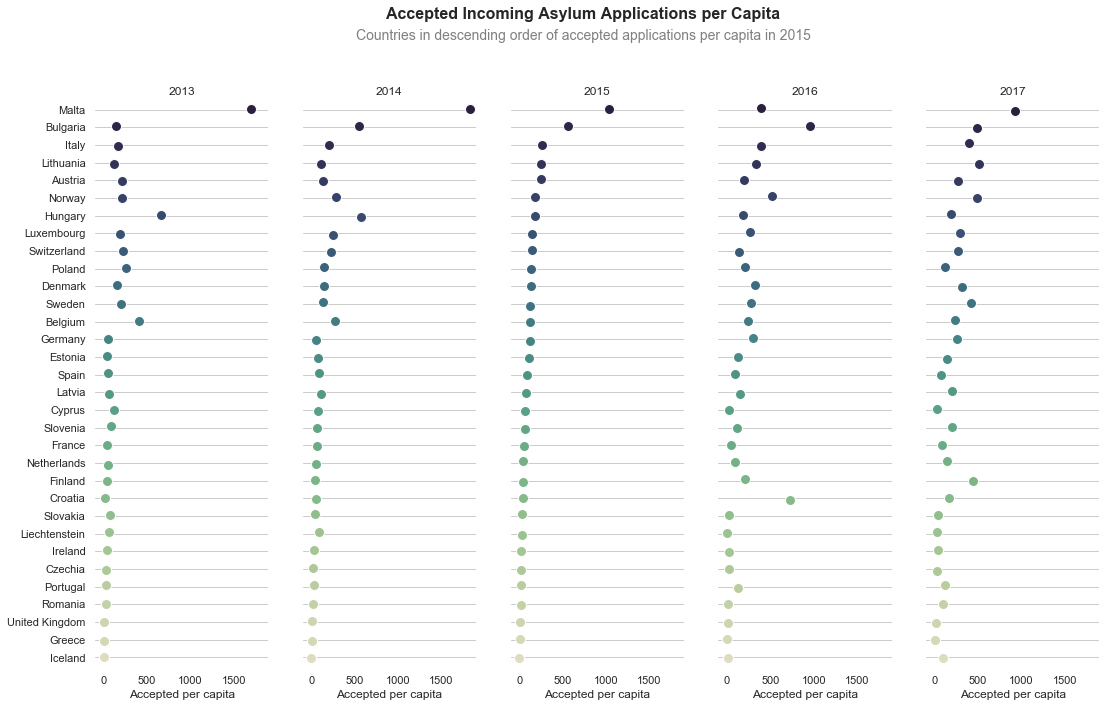

In [79]:
# Style
sns.set(style='whitegrid')

# Set up PairGrid
g = sns.PairGrid(data=df_asylum_inc_pc.sort_values('2015', ascending=False),
                x_vars=df_asylum_inc_pc.columns[1:], y_vars=['country'],
                height=10, aspect=0.3)

# Create stripplot
g.map(sns.stripplot, size=10, orient='h', palette=sns.cubehelix_palette(32, start=0.5, rot=-0.8, reverse=True),
     linewidth=1, edgecolor='w')

# Set x-axis limits on all columns
g.set(xlim=(-100, 1900), xlabel="Accepted per capita", ylabel="")

# Column titles
titles =['2013', '2014', '2015', '2016', '2017']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Accepted Incoming Asylum Applications per Capita', size=16, weight='demi')
plt.figtext(0.5,0.95, 'Countries in descending order of accepted applications per capita in 2015', ha="center", va="top", fontsize=14, color='grey');

In [80]:
df_asylum_inc_pgdp.max()

year
country    United Kingdom
2013              94698.7
2014              92497.9
2015              89757.9
2016               141787
2017              66604.7
dtype: object

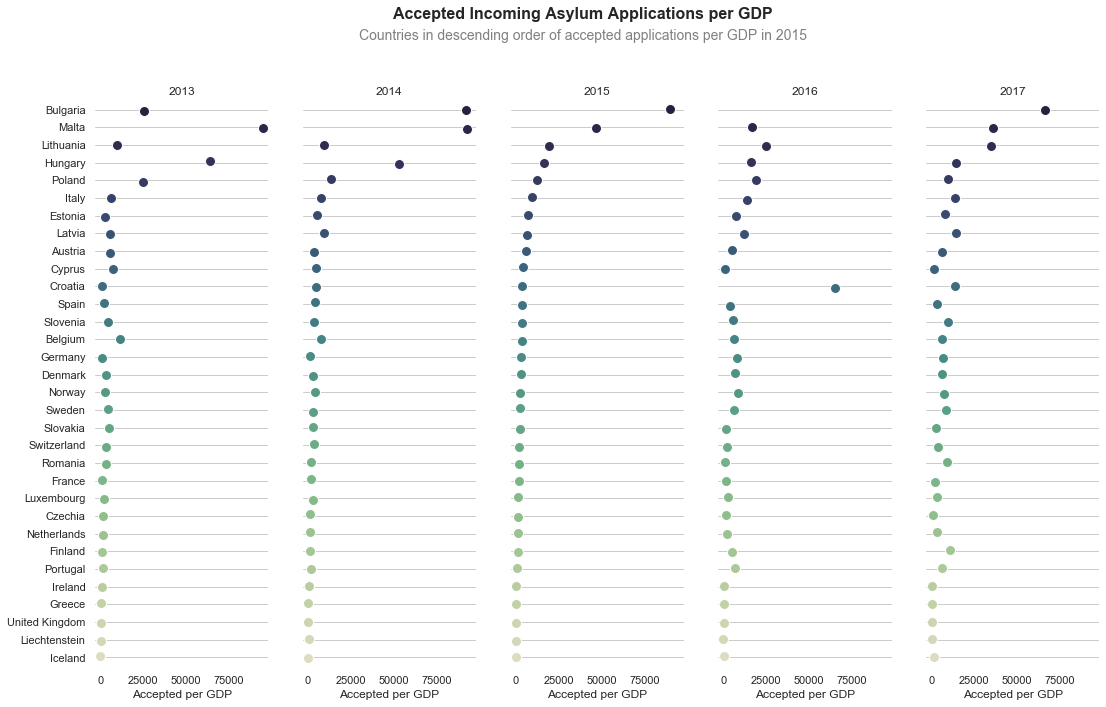

In [81]:
# Style
sns.set(style='whitegrid')

# Set up PairGrid
g = sns.PairGrid(data=df_asylum_inc_pgdp.sort_values('2015', ascending=False),
                x_vars=df_asylum_inc_pgdp.columns[1:], y_vars=['country'],
                height=10, aspect=0.3)

# Create stripplot
g.map(sns.stripplot, size=10, orient='h', palette=sns.cubehelix_palette(32, start=0.5, rot=-0.8, reverse=True),
     linewidth=1, edgecolor='w')

# Set x-axis limits on all columns
g.set(xlim=(-3000, 98000), xlabel="Accepted per GDP", ylabel="")

# Column titles
titles =['2013', '2014', '2015', '2016', '2017']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Accepted Incoming Asylum Applications per GDP', size=16, weight='demi')
plt.figtext(0.5,0.95, 'Countries in descending order of accepted applications per GDP in 2015', ha="center", va="top", fontsize=14, color='grey');

## Immigration policy, enforcement, and effectiveness

In [82]:
# THIRD COUNTRY NATIONALS (TCN) ILLEGALLY PRESENT
# https://ec.europa.eu/eurostat/cache/metadata/en/migr_eil_esms.htm
df_tcn_illegal_pres = clean_eurostat_excel('migr_illegally_present.xlsx', 'Data')

dfg_tcn_illegal_pres = df_to_longform(df_tcn_illegal_pres, 'illegally_pres')

dfg_tcn_illegal_pres.head(1)

,country,year,illegally_pres
19,Austria,2009,17145.0


In [83]:
# TCN ILLEGALLY PRESENT GIVEN LEAVE ORDERS DATA
# https://ec.europa.eu/eurostat/cache/metadata/en/migr_eil_esms.htm
df_tcn_leave_order = clean_eurostat_excel('migr_leave_order.xlsx', 'migr_eiord')

dfg_tcn_leave_order = df_to_longform(df_tcn_leave_order, 'leave_order')

dfg_tcn_leave_order.head(1)

,country,year,leave_order
19,Austria,2009,10625.0


In [84]:
# TCN REFUSED AT BORDER CROSSINGS DATA 
# https://ec.europa.eu/eurostat/cache/metadata/en/migr_eil_esms.htm
df_tcn_refused = clean_eurostat_excel('migr_refused_entry.xlsx', 'migr_eirfs')

dfg_tcn_refused = df_to_longform(df_tcn_refused, 'refused_border')

dfg_tcn_refused.head(1)

,country,year,refused_border
19,Austria,2009,645.0


In [85]:
# TCN ILLEGALLY PRESENT THAT LEFT COUNTRY AFTER LEAVE ORDER DATA
# https://ec.europa.eu/eurostat/cache/metadata/en/migr_eil_esms.htm
df_tcn_returned = clean_eurostat_excel('migr_eirtn.xlsx', 'total_returned')

dfg_tcn_returned = df_to_longform(df_tcn_returned, 'illegal_returned')

dfg_tcn_returned.head(1)

C:\Users\Hillary\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


,country,year,illegal_returned
19,Austria,2009,6410.0


In [86]:
# TCN ILLEGALLY PRESENT THAT LEFT COUNTRY AND EU AFTER LEAVE ORDER DATA
# https://ec.europa.eu/eurostat/cache/metadata/en/migr_eil_esms.htm
df_tcn_returned_third = clean_eurostat_excel('migr_eirtn.xlsx', 'returned_third_country')

dfg_tcn_returned_third = df_to_longform(df_tcn_returned_third, 'illegal_returned_thirdcountry')

dfg_tcn_returned_third.head(1)

C:\Users\Hillary\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


,country,year,illegal_returned_thirdcountry
19,Austria,2009,4975.0


In [87]:
# Merge all into graphing dataframe
dfs = [dfg, dfg_tcn_illegal_pres, dfg_tcn_leave_order, dfg_tcn_refused,
       dfg_tcn_returned, dfg_tcn_returned_third]

dfg = reduce(lambda left, right: pd.merge(left, right, on=['country', 'year'],
                                        how='inner'), dfs)     

dfg.info()
dfg.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 287
Data columns (total 22 columns):
country                                288 non-null object
year                                   288 non-null object
immigrants                             288 non-null float64
emigrants                              288 non-null float64
reporting_country_emi                  288 non-null float64
pop_in_thous                           288 non-null int64
immigrants_per_capita                  288 non-null float64
emigrants_per_capita                   288 non-null float64
GDP                                    288 non-null float64
GDP_pc                                 288 non-null float64
immigrants_per_GDP                     288 non-null float64
emigrants_per_GDP                      288 non-null float64
asylum_apps                            288 non-null float64
asylum_accepted_outgoing               288 non-null float64
asylum_accepted_incoming               288 non-null float64

,country,year,immigrants,emigrants,reporting_country_emi,pop_in_thous,immigrants_per_capita,emigrants_per_capita,GDP,GDP_pc,...,asylum_apps,asylum_accepted_outgoing,asylum_accepted_incoming,asylum_accepted_incoming_per_capita,asylum_accepted_incoming_per_GDP,illegally_pres,leave_order,refused_border,illegal_returned,illegal_returned_thirdcountry
0,Austria,2009,69295.0,53244.0,16376.0,8372,8.276995,6.359771,288044.0,34.405638,...,15780.0,4632.0,1313.0,156.832298,4558.331366,17145.0,10625.0,645.0,6410.0,4975.0


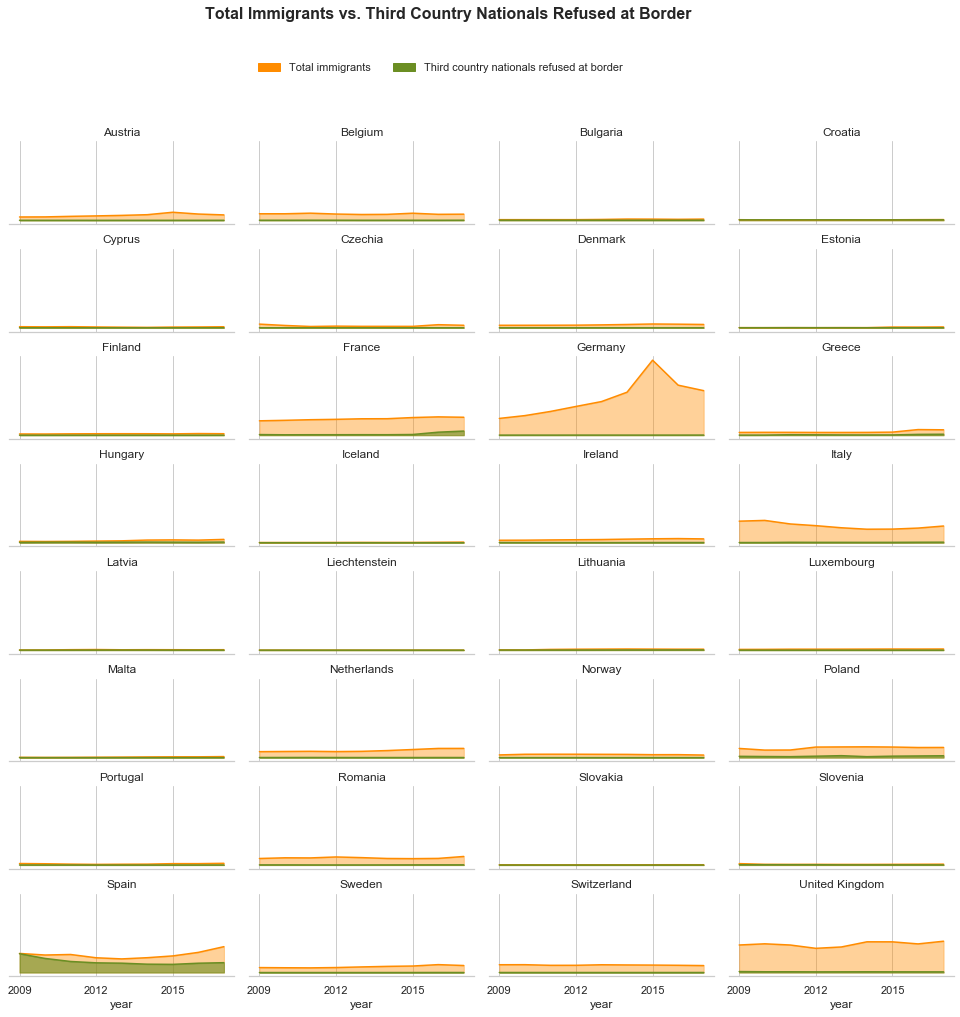

In [107]:
# Initialize FacetGrid object
g = sns.FacetGrid(dfg, col='country', col_wrap=4, height=1.8,
                  aspect=2).set(xticks=np.arange(0,10,3))


# Create immigration plot - set for immigrants
g.map(plt.plot, 'year', 'immigrants', color='darkorange')
g.map(plt.fill_between, 'year', 'immigrants',  color='darkorange', alpha=0.4)

g.map(plt.plot, 'year', 'refused_border', color='olivedrab')
g.map(plt.fill_between, 'year', 'refused_border',  color='olivedrab', alpha=0.6)

# Facet titles
for ax in g.axes:
    g.set_titles("{col_name}")
    g.set_axis_labels(y_var= '')

# Formatting axes
g.set(yticks=[])
g.despine(left=True)

# Legend
color_key = {'Total immigrants': 'darkorange',
            'Third country nationals refused at border' : 'olivedrab'}

patches =  [pat.Patch(color=v, label=k) for k,v in color_key.items()]

g.fig.legend(handles=patches, bbox_to_anchor =
             [0.61, 0.93], ncol=2).get_frame().set_edgecolor('1.0')

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Total Immigrants vs. Third Country Nationals Refused at Border', size=16, weight='demi');

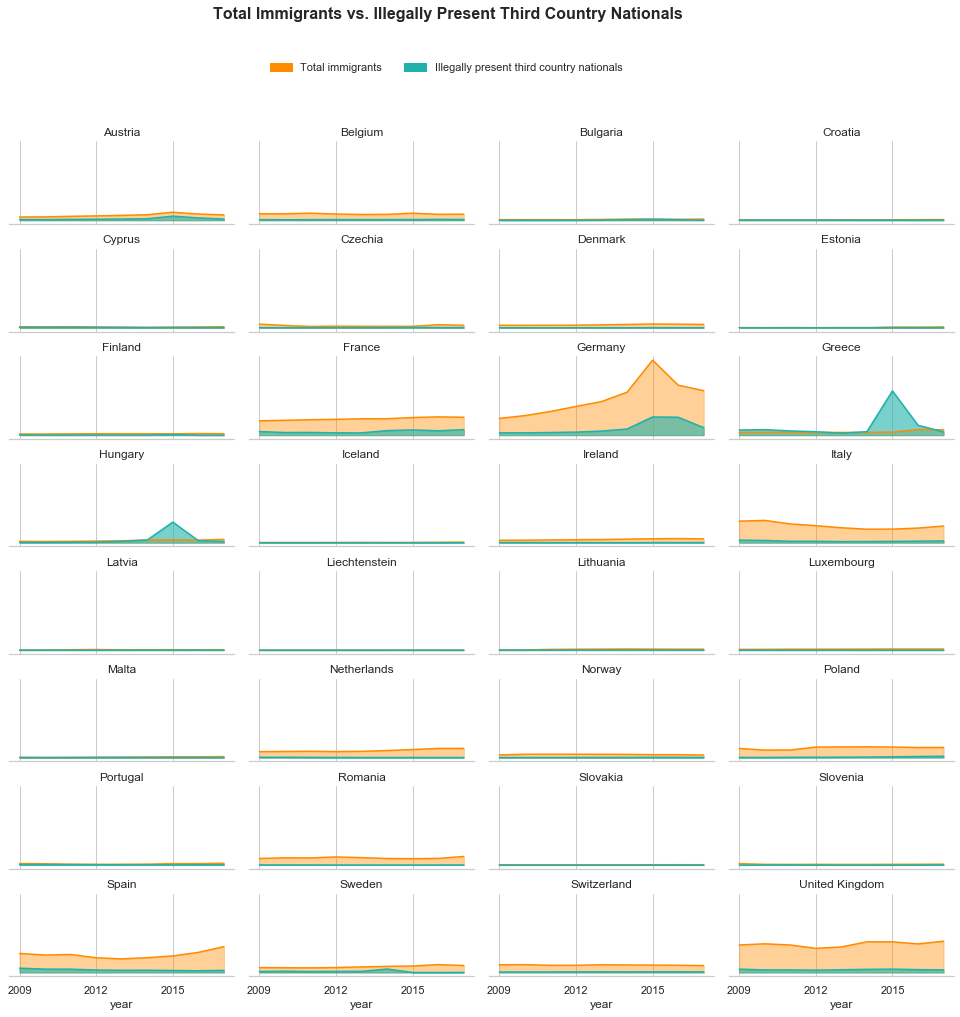

In [108]:
# Initialize FacetGrid object
g = sns.FacetGrid(dfg, col='country', col_wrap=4, height=1.8,
                  aspect=2).set(xticks=np.arange(0,10,3))


# Create immigration plot - set for immigrants
g.map(plt.plot, 'year', 'immigrants', color='darkorange')
g.map(plt.fill_between, 'year', 'immigrants',  color='darkorange', alpha=0.4)

g.map(plt.plot, 'year', 'illegally_pres', color='lightseagreen')
g.map(plt.fill_between, 'year', 'illegally_pres',  color='lightseagreen', alpha=0.6)

# Facet titles
for ax in g.axes:
    g.set_titles("{col_name}")
    g.set_axis_labels(y_var= '')

# Formatting axes
g.set(yticks=[])
g.despine(left=True)

# Legend
color_key = {'Total immigrants': 'darkorange',
            'Illegally present third country nationals' : 'lightseagreen'}

patches =  [pat.Patch(color=v, label=k) for k,v in color_key.items()]

g.fig.legend(handles=patches, bbox_to_anchor =
             [0.61, 0.93], ncol=2).get_frame().set_edgecolor('1.0')

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Total Immigrants vs. Illegally Present Third Country Nationals', size=16, weight='demi');

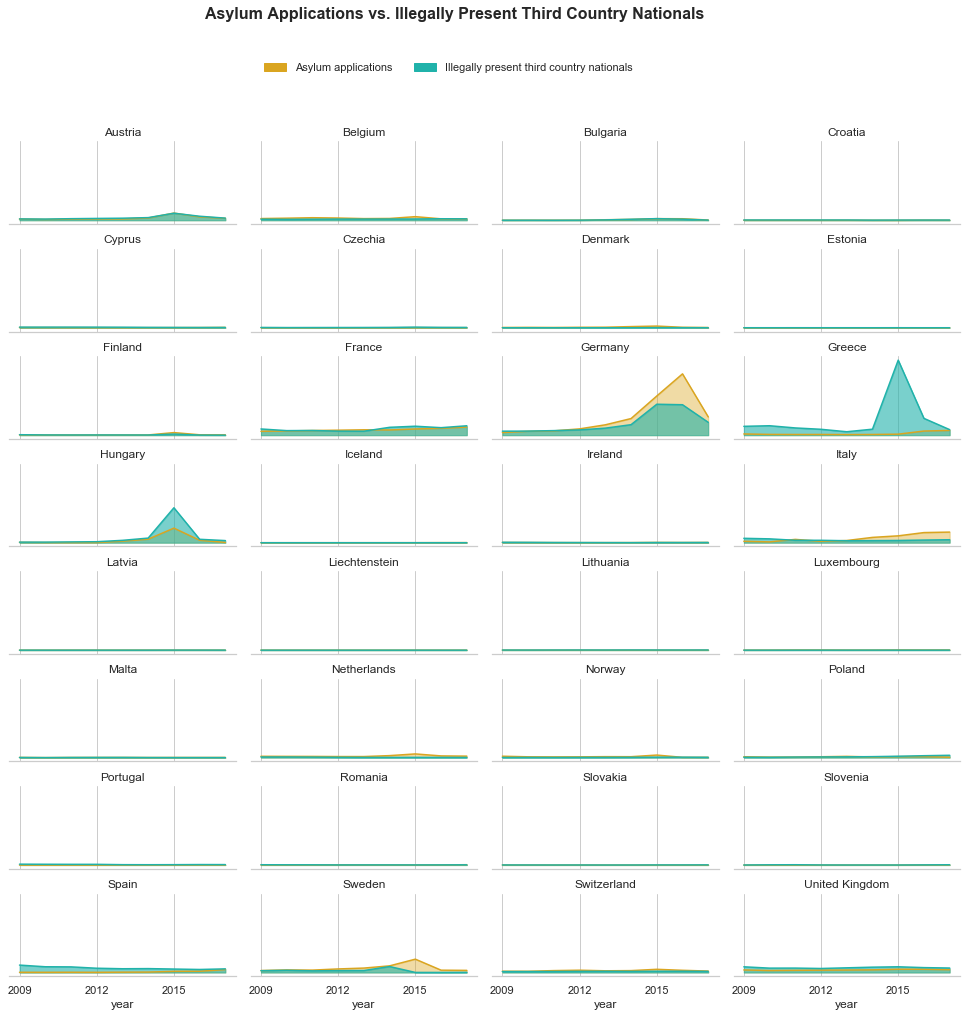

In [114]:
# Initialize FacetGrid object
g = sns.FacetGrid(dfg, col='country', col_wrap=4, height=1.8,
                  aspect=2).set(xticks=np.arange(0,10,3))


# Create immigration plot - set for immigrants
g.map(plt.plot, 'year', 'asylum_apps', color='goldenrod')
g.map(plt.fill_between, 'year', 'asylum_apps',  color='goldenrod', alpha=0.4)

g.map(plt.plot, 'year', 'illegally_pres', color='lightseagreen')
g.map(plt.fill_between, 'year', 'illegally_pres',  color='lightseagreen', alpha=0.6)

# Facet titles
for ax in g.axes:
    g.set_titles("{col_name}")
    g.set_axis_labels(y_var= '')

# Formatting axes
g.set(yticks=[])
g.despine(left=True)

# Legend
color_key = {'Asylum applications': 'goldenrod',
            'Illegally present third country nationals' : 'lightseagreen'}

patches =  [pat.Patch(color=v, label=k) for k,v in color_key.items()]

g.fig.legend(handles=patches, bbox_to_anchor =
             [0.62, 0.93], ncol=2).get_frame().set_edgecolor('1.0')

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Asylum Applications vs. Illegally Present Third Country Nationals', size=16, weight='demi');

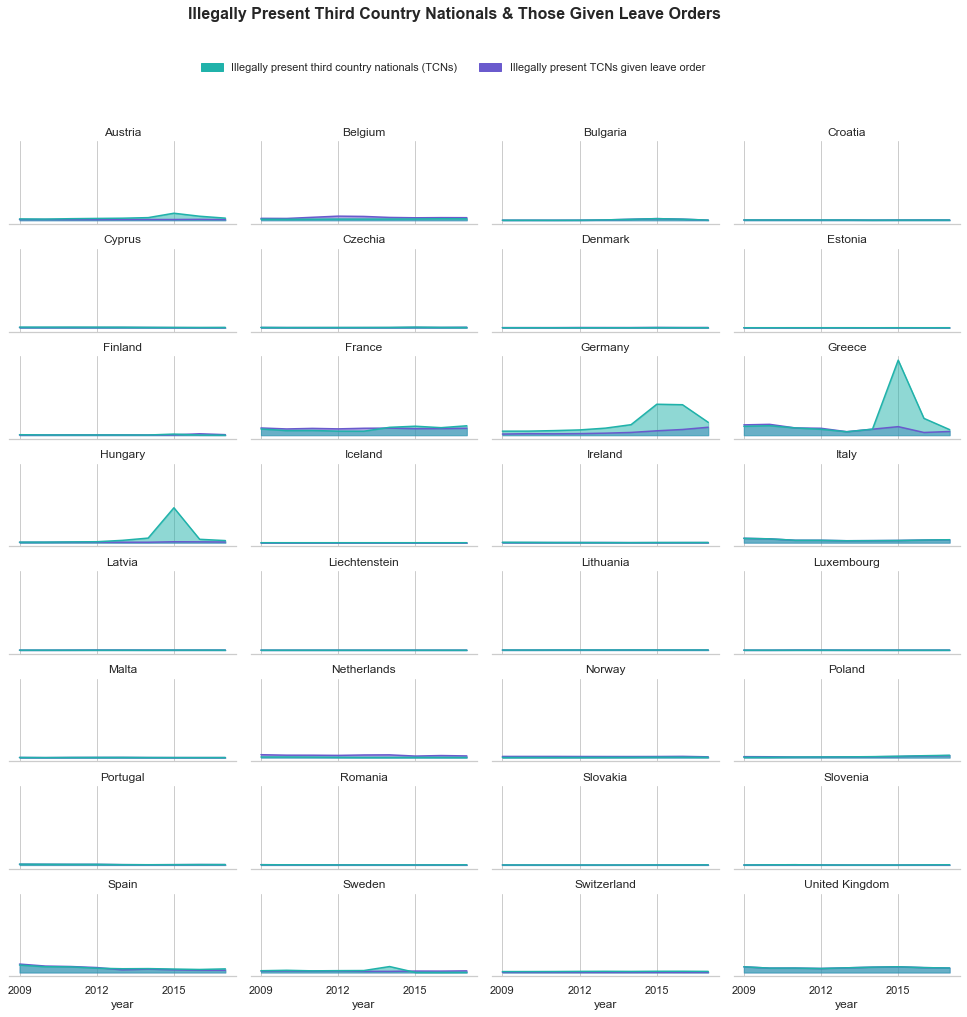

In [116]:
# Initialize FacetGrid object
g = sns.FacetGrid(dfg, col='country', col_wrap=4, height=1.8,
                  aspect=2).set(xticks=np.arange(0,10,3))


# Create immigration plot - set for immigrants
g.map(plt.plot, 'year', 'leave_order', color='slateblue')
g.map(plt.fill_between, 'year', 'leave_order',  color='slateblue', alpha=0.5)

g.map(plt.plot, 'year', 'illegally_pres', color='lightseagreen')
g.map(plt.fill_between, 'year', 'illegally_pres',  color='lightseagreen', alpha=0.5)

# Facet titles
for ax in g.axes:
    g.set_titles("{col_name}")
    g.set_axis_labels(y_var= '')

# Formatting axes
g.set(yticks=[])
g.despine(left=True)

# Legend
color_key = {'Illegally present third country nationals (TCNs)' : 'lightseagreen',
            'Illegally present TCNs given leave order': 'slateblue'}

patches =  [pat.Patch(color=v, label=k) for k,v in color_key.items()]

g.fig.legend(handles=patches, bbox_to_anchor =
             [0.69, 0.93], ncol=2).get_frame().set_edgecolor('1.0')

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Illegally Present Third Country Nationals & Those Given Leave Orders', size=16, weight='demi');

In [92]:
# Find countries with NaNs
dfg[dfg[['illegal_returned']].isna().any(axis=1)]['country'].unique()

array(['Switzerland'], dtype=object)

In [93]:
# Create new dataframe and drop NaN rows
dfg2 = dfg[['country', 'year', 'leave_order', 'illegal_returned', 'illegal_returned_thirdcountry']]

dfg2.dropna(inplace=True)

dfg2.isnull().sum()

C:\Users\Hillary\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


country                          0
year                             0
leave_order                      0
illegal_returned                 0
illegal_returned_thirdcountry    0
dtype: int64

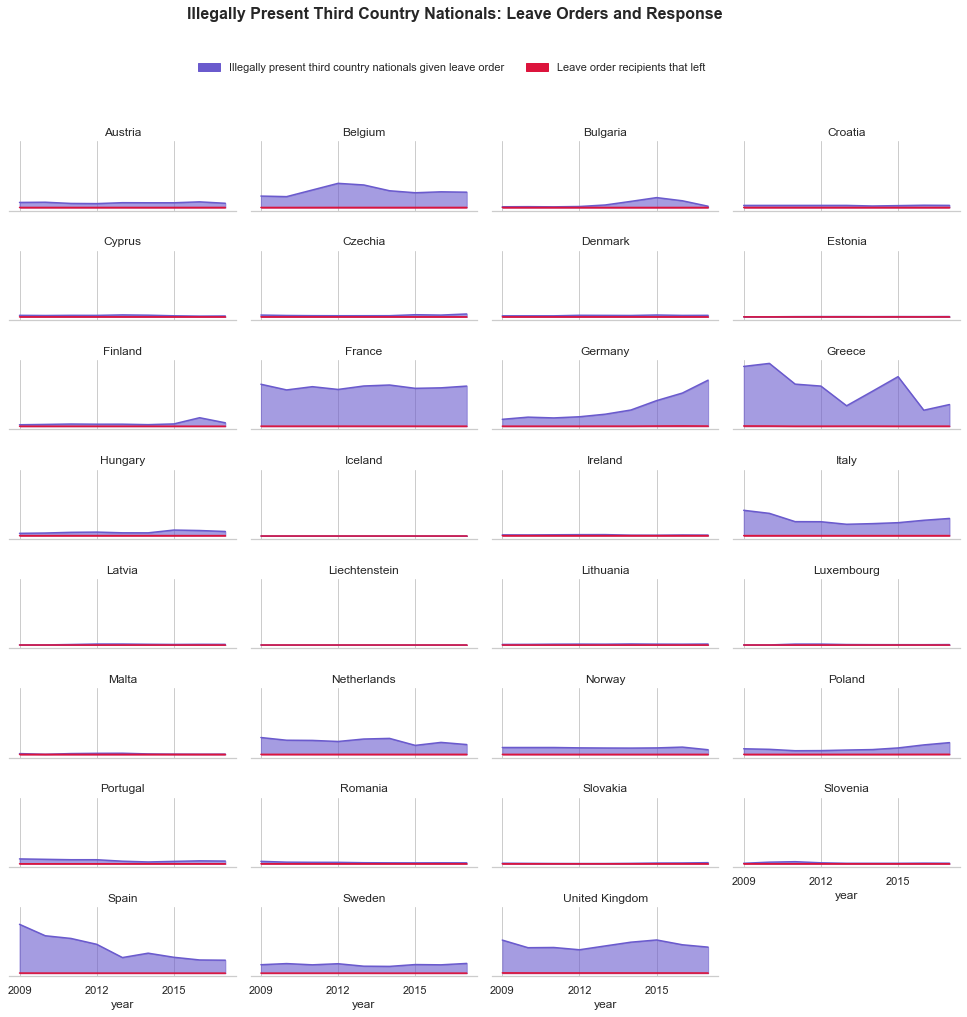

In [121]:
# Initialize FacetGrid object
g = sns.FacetGrid(dfg2, col='country', col_wrap=4, height=1.8,
                  aspect=2).set(xticks=np.arange(0,10,3))


# Create immigration plot - set for immigrants
g.map(plt.plot, 'year', 'leave_order', color='slateblue')
g.map(plt.fill_between, 'year', 'leave_order',  color='slateblue', alpha=0.6)

g.map(plt.plot, 'year', 'illegal_returned', color='crimson')
g.map(plt.fill_between, 'year', 'illegal_returned',  color='crimson', alpha=0.6)

# Facet titles
for ax in g.axes:
    g.set_titles("{col_name}")
    g.set_axis_labels(y_var= '')

# Formatting axes
g.set(yticks=[])
g.despine(left=True)

# Legend
color_key = {'Illegally present third country nationals given leave order': 'slateblue',
            'Leave order recipients that left' : 'crimson'}

patches =  [pat.Patch(color=v, label=k) for k,v in color_key.items()]

g.fig.legend(handles=patches, bbox_to_anchor =
             [0.69, 0.93], ncol=2).get_frame().set_edgecolor('1.0')

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Illegally Present Third Country Nationals: Leave Orders and Response', size=16, weight='demi');

In [95]:
dfg3 = dfg2.groupby(['country']).sum().reset_index()

dfg3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
country                          31 non-null object
leave_order                      31 non-null float64
illegal_returned                 31 non-null float64
illegal_returned_thirdcountry    31 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.1+ KB


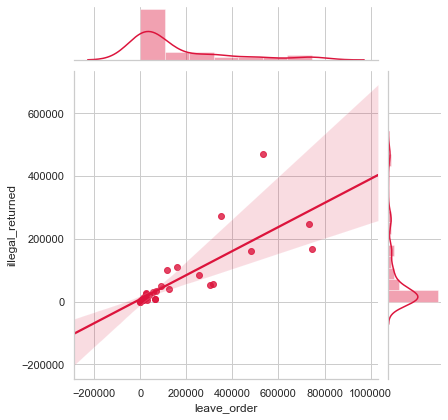

In [96]:
# Relationship between leave orders and compliance?
# relationship is heteroskedastic
g = sns.jointplot(data=dfg3, x='leave_order', y='illegal_returned',
                                   kind='reg', color='crimson');

In [97]:
# Resizing data for graph visual (no y-axis, only visual relative comparison)
dfg2['illegal_returned'] = dfg2['illegal_returned']/100
dfg2['illegal_returned_thirdcountry'] = dfg2['illegal_returned_thirdcountry']/100

C:\Users\Hillary\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hillary\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


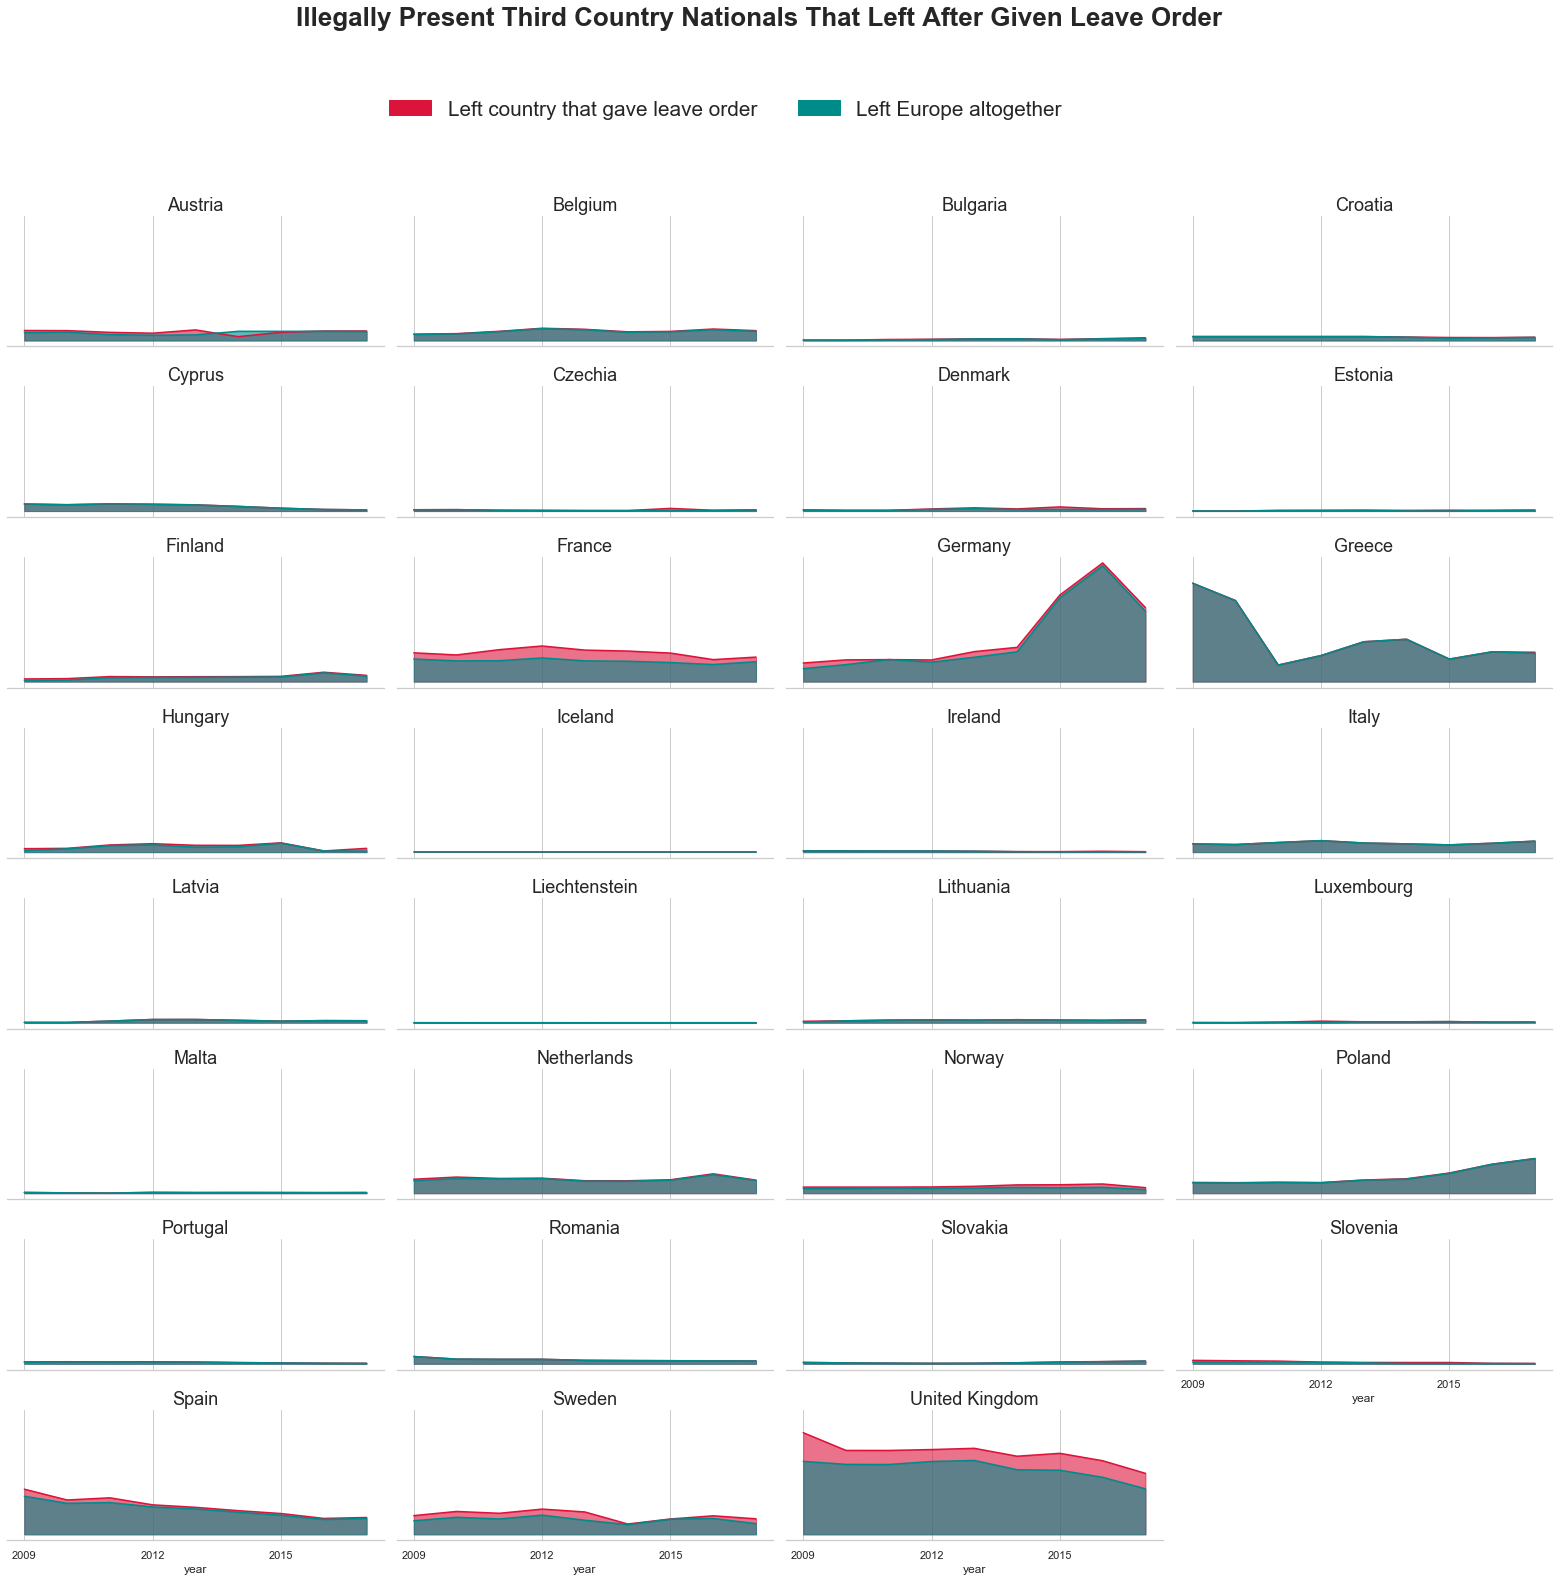

In [122]:
# Initialize FacetGrid object
g = sns.FacetGrid(dfg2, col='country', col_wrap=4, height=2.8,
                  aspect=2).set(xticks=np.arange(0,10,3))

# Create immigration plot - set for immigrants
g.map(plt.plot, 'year', 'illegal_returned', color='crimson')
g.map(plt.fill_between, 'year', 'illegal_returned',  color='crimson', alpha=0.6)

g.map(plt.plot, 'year', 'illegal_returned_thirdcountry', color='darkcyan')
g.map(plt.fill_between, 'year', 'illegal_returned_thirdcountry',  color='darkcyan', alpha=0.6)

# Facet titles
for ax in g.axes:
    g.set_titles("{col_name}", size=18)
    g.set_axis_labels(y_var= '')

# Formatting axes
g.set(yticks=[])
g.despine(left=True)

# Legend
color_key = {'Left country that gave leave order': 'crimson',
            'Left Europe altogether' : 'darkcyan'}

patches =  [pat.Patch(color=v, label=k) for k,v in color_key.items()]

g.fig.legend(handles=patches, bbox_to_anchor =
             [0.67, 0.93], ncol=2, fontsize='xx-large').get_frame().set_edgecolor('1.0')

# Title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Illegally Present Third Country Nationals That Left After Given Leave Order', size=26, weight='demi');